## __데이터 증량 + 파라미터 튜닝__

In [1]:
!pip install -q datasets transformers librosa jiwer accelerate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### __1.Load datasets__
- 100 -> 200

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

ko = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 200))
en = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

dataset = Dataset.from_list(ko + en + ja + de)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 642.95it/s]
Reading metadata...: 1013968it [00:23, 43604.97it/s]
Reading metadata...: 7071it [00:00, 22026.08it/s]
Reading metadata...: 540437it [00:14, 37885.57it/s]


### __2.Load Whisper-small__

In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-small"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

### __3.Preprocessing__

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/792 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_multi_small_trial2",
    per_device_train_batch_size=8, #4->8
    learning_rate=3e-5,       #1e-5 -> 3e-5
    num_train_epochs=5,       #3 -> 5
    logging_steps=10,       #5 -> 10
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-26d3ea854a24>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


### __4.Training__

In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,7.190400
20,4.278200
30,2.980400
40,2.497500
50,2.159700
60,1.806100
70,1.893400
80,1.605500
90,1.350900
100,1.279700


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=495, training_loss=0.649191166693815, metrics={'train_runtime': 781.1691, 'train_samples_per_second': 5.069, 'train_steps_per_second': 0.634, 'total_flos': 1.1427981852672e+18, 'train_loss': 0.649191166693815, 'epoch': 5.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_multi_small_trial2"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

### __5.Prediction__

In [10]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"\n🌍 Language: {lang}")
    lang_data = [x for x in dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"\n🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"\n✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/192 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/192 [00:08<28:36,  8.99s/it]


🔹 Predicted:  ಎರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 어느덧 그 더운 팔월도 하루를 남기고 다 지나 버렸다.


  1%|          | 2/192 [00:09<12:44,  4.02s/it]


🔹 Predicted: 근자에 춘우의 동료 사이에는 이상한 소문이 돌아다니었다.
🔸 Reference: 근자에 춘우의 동료 사이에는 이상한 소문이 돌아다니었다.


  2%|▏         | 3/192 [00:10<07:33,  2.40s/it]


🔹 Predicted: 재차 부르는 소리를 듣고야 선비는 발길을 떼었다.
🔸 Reference: 재차 부르는 소리를 듣고야 선비는 발길을 떼었다.


  2%|▏         | 4/192 [00:10<05:03,  1.61s/it]


🔹 Predicted:  그애의 말값으로 찾아나 봤으면 되는 것 아니냐.
🔸 Reference: 그애의 말값으로 찾아나 봤으면 되는 것 아니냐.


  3%|▎         | 5/192 [00:10<03:48,  1.22s/it]


🔹 Predicted: 그가 방으로 들어오니 간난이가 와서 그의 하던 일을 하고 있었다.
🔸 Reference: 그가 방으로 들어오니 간난이가 와서 그의 하던 일을 하고 있었다.


  3%|▎         | 6/192 [00:11<02:48,  1.11it/s]


🔹 Predicted: 안녕히 다녀옵시요.
🔸 Reference: 안녕히 다녀옵시요.


  4%|▎         | 7/192 [00:11<02:28,  1.25it/s]


🔹 Predicted: 어떻게 무엇부터 시작을 해야 할는지 엄두가 나지를 않아서 잠을 잘 수가 없었다.
🔸 Reference: 어떻게 무엇부터 시작을 해야 할는지 엄두가 나지를 않아서 잠을 잘 수가 없었다.


  4%|▍         | 8/192 [00:12<01:58,  1.55it/s]


🔹 Predicted: 죽는 날까지 하늘을 우러러
🔸 Reference: 죽는 날까지 하늘을 우러러


  5%|▍         | 9/192 [00:12<01:42,  1.78it/s]


🔹 Predicted: 그리고 그 어두운 방 안이 휙 지나친다.
🔸 Reference: 그리고 그 어두운 방 안이 휙 지나친다.


  5%|▌         | 10/192 [00:20<08:41,  2.87s/it]


🔹 Predicted:  ಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಿಎರಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿ
🔸 Reference: 왜 눈을 바루 뜨지 못해!


  6%|▌         | 11/192 [00:21<06:33,  2.17s/it]


🔹 Predicted: 영신은 바라던 대로 바닷가 한가한 집에서 편안히 쉴 수가 있었다.
🔸 Reference: 영신은 바라던 대로 바닷가 한가한 집에서 편안히 쉴 수가 있었다.


  6%|▋         | 12/192 [00:21<04:51,  1.62s/it]


🔹 Predicted: 잡을 수 없는 저 하늘의 별도 잡자.
🔸 Reference: 잡을 수 없는 저 하늘의 별도 잡자.


  7%|▋         | 13/192 [00:21<03:47,  1.27s/it]


🔹 Predicted:  वागो, 목메인 소리가 뒤를 따랐다.
🔸 Reference: 하고, 목메인 소리가 뒤를 따랐다.


  7%|▋         | 14/192 [00:22<03:03,  1.03s/it]


🔹 Predicted: 그리고 그의 하던 말을 곰곰이 되풀이하였다.
🔸 Reference: 그리고 그의 하던 말을 곰곰이 되풀이하였다.


  8%|▊         | 15/192 [00:30<09:18,  3.15s/it]


🔹 Predicted:  ಎರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿರರಿದರರರಿರರರಿರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 영원한 것이 어디 있는가?


  8%|▊         | 16/192 [00:31<06:59,  2.38s/it]


🔹 Predicted: 그것은 예수가 십자가에 못박히며 최후로 부르짖은 말이었다.
🔸 Reference: 그것은 예수가 십자가에 못박히며 최후로 부르짖은 말이었다.


  9%|▉         | 17/192 [00:31<05:17,  1.81s/it]


🔹 Predicted:  그 틈에 그 짐짝은 딴놈이 메고 달아난다.
🔸 Reference: 그 틈에 그 짐짝은 딴놈이 메고 달아난다.


  9%|▉         | 18/192 [00:32<04:06,  1.42s/it]


🔹 Predicted: 그는 이러한 생각을 되풀이하는 새 벌써 간난네 집까지 왔다.
🔸 Reference: 그는 이러한 생각을 되풀이하는 새 벌써 간난네 집까지 왔다.


 10%|▉         | 19/192 [00:32<03:19,  1.16s/it]


🔹 Predicted: 양식 떨어진 사람이 보릿고개를 넘기는것만치 나 까마아득한 것 같습니다.
🔸 Reference: 양식 떨어진 사람이 보릿고개를 넘기는것만치 나 까마아득한 것 같습니다.


 10%|█         | 20/192 [00:33<02:40,  1.07it/s]


🔹 Predicted: 그래서 그는 억지로 웃어 보이고 말았다.
🔸 Reference: 그래서 그는 억지로 웃어 보이고 말았다.


 11%|█         | 21/192 [00:33<02:21,  1.21it/s]


🔹 Predicted:  यonへ 꾸짖으며, 질팡갈팡 뛰는 수밖에 없었다.
🔸 Reference: 연해 꾸짖으며 질팡갈팡 뛰는 수밖에 없었다.


 11%|█▏        | 22/192 [00:34<02:00,  1.42it/s]


🔹 Predicted: 영신을 눕히고 자세히 진찰을 해본다.
🔸 Reference: 영신을 눕히고 자세히 진찰을 해본다.


 12%|█▏        | 23/192 [00:34<01:40,  1.69it/s]


🔹 Predicted:  뼈씨 퇴근하려고?
🔸 Reference: 몇 시 퇴근하려고?


 12%|█▎        | 24/192 [00:34<01:37,  1.72it/s]


🔹 Predicted: 국회는 의원의 자격을 심사하며, 의원을 징계할 수 있다.
🔸 Reference: 국회는 의원의 자격을 심사하며, 의원을 징계할 수 있다.


 13%|█▎        | 25/192 [00:35<01:41,  1.64it/s]


🔹 Predicted: アタメモデン 육축과 공중의 새와 들의モデン 짐승에게 이름을 주니라
🔸 Reference: 아담이 모든 육축과 공중의 새와 들의 모든 짐승에게 이름을 주니라


 14%|█▎        | 26/192 [00:36<01:38,  1.69it/s]


🔹 Predicted:  그 뒤로 게 딱지 같은 집들이 오글오글 쫓겨서 몰려들어 간다.
🔸 Reference: 그 뒤로 게 딱지 같은 집들이 오글오글 쫓겨서 몰려들어 간다.


 14%|█▍        | 27/192 [00:36<01:38,  1.67it/s]


🔹 Predicted: 그리고 그의 옷이 땀에 배어 어룽어룽하니 말라진 것을 보았다.
🔸 Reference: 그리고 그의 옷이 땀에 배어 어룽어룽하니 말라진 것을 보았다.


 15%|█▍        | 28/192 [00:37<01:28,  1.86it/s]


🔹 Predicted: 춘우는 자기 아버지가 약주 취하신 것을 알았다.
🔸 Reference: 춘우는 자기 아버지가 약주 취하신 것을 알았다.


 15%|█▌        | 29/192 [00:38<01:44,  1.55it/s]


🔹 Predicted:  जिर्वाव व्च्वंजाव पोजिम्या 얼굴이 화끈하였다.
🔸 Reference: 찌르릉 하고 창자에 퍼지며 얼굴이 화끈하였다.


 16%|█▌        | 30/192 [00:38<01:40,  1.62it/s]


🔹 Predicted: 바람은 파도 소리처럼 쏴아쏴아 하고 머리 맡에서 뒤설렌다.
🔸 Reference: 바람은 파도 소리처럼 쏴아쏴아 하고 머리 맡에서 뒤설렌다.


 16%|█▌        | 31/192 [00:39<01:31,  1.76it/s]


🔹 Predicted:  छौनौ에게 이 모든 사정의 말을 하여 버릴까
🔸 Reference: 춘우에게 이 모든 사정의 말을 하여 버릴까.


 17%|█▋        | 32/192 [00:39<01:27,  1.84it/s]


🔹 Predicted: 길 가는 사람이 걱정을 하리만큼 그의 걸음은 황급하였다.
🔸 Reference: 길 가는 사람이 걱정을 하리만큼 그의 걸음은 황급하였다.


 17%|█▋        | 33/192 [00:40<01:33,  1.70it/s]


🔹 Predicted: 선비는 간난이가 저렇게 늦게 돌아올 때마다 무엇을 깊이 생각하는 것이 수상스러웠다.
🔸 Reference: 선비는 간난이가 저렇게 늦게 돌아올 때마다 무엇을 깊이 생각하는 것이 수상스러웠다.


 18%|█▊        | 34/192 [00:40<01:21,  1.94it/s]


🔹 Predicted:  부엌은 아름답게 장식되었습니다.
🔸 Reference: 부엌은 아름답게 장식되었습니다.


 18%|█▊        | 35/192 [00:41<01:20,  1.96it/s]


🔹 Predicted: 신철이는 할멈이 깨었으므로 그만 낙망을 하였다.
🔸 Reference: 신철이는 할멈이 깨었으므로 그만 낙망을 하였다.


 19%|█▉        | 36/192 [00:41<01:19,  1.96it/s]


🔹 Predicted: 磨きつきの 얼굴を 쳐들고 첫째의 눈치를 살살 본다.
🔸 Reference: 납작한 얼굴을 쳐들고 첫째의 눈치를 살살 본다.


 19%|█▉        | 37/192 [00:42<01:24,  1.83it/s]


🔹 Predicted: 아담과 그 아내가 여호와 하나님의 낯을 피하여 동산 나무 사이에 숨은지라
🔸 Reference: 아담과 그 아내가 여호와 하나님의 낯을 피하여 동산 나무 사이에 숨은지라


 20%|█▉        | 38/192 [00:42<01:11,  2.16it/s]


🔹 Predicted:  나은 두 번째 그에게 물었습니다.
🔸 Reference: 나는 두 번째 그에게 물었습니다.


 20%|██        | 39/192 [00:50<06:57,  2.73s/it]


🔹 Predicted:  ಕರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 무소식이 희소식이다


 21%|██        | 40/192 [00:50<05:09,  2.04s/it]


🔹 Predicted:  그는 대답 대신에 늘 이렇게 웃는 것이 버릇이다.
🔸 Reference: 그는 대답 대신에 늘 이렇게 웃는 것이 버릇이다.


 21%|██▏       | 41/192 [00:51<04:01,  1.60s/it]


🔹 Predicted: 대저 너희가 지식을 미워하며 여호와 경외하기를 즐거워하지 아니하며
🔸 Reference: 대저 너희가 지식을 미워하며 여호와 경외하기를 즐거워하지 아니하며


 22%|██▏       | 42/192 [00:51<02:57,  1.18s/it]


🔹 Predicted: 경기 시작됐습니다.
🔸 Reference: 경기 시작됐습니다.


 22%|██▏       | 43/192 [00:52<02:35,  1.05s/it]


🔹 Predicted: 선비는 육백삼호인 가마 곁으로 와서 동무의 어깨를 가볍게 쳤다.
🔸 Reference: 선비는 육백삼호인 가마 곁으로 와서 동무의 어깨를 가볍게 쳤다.


 23%|██▎       | 44/192 [00:52<02:11,  1.12it/s]


🔹 Predicted: 그래서 간난 어머니는 눈을 둥그렇게 뜨고 눈치를 살폈다.
🔸 Reference: 그래서 간난 어머니는 눈을 둥그렇게 뜨고 눈치를 살폈다.


 23%|██▎       | 45/192 [00:53<01:55,  1.27it/s]


🔹 Predicted: 그러자 엉엉 하고 우는 개똥이의 곡성을 들은 듯싶다.
🔸 Reference: 그러자 엉엉 하고 우는 개똥이의 곡성을 들은 듯싶다.


 24%|██▍       | 46/192 [00:54<01:45,  1.38it/s]


🔹 Predicted: 그러나 무엇이라고 꼭 집어대어 철수와 같이 술술 지껄일수는 없었다.
🔸 Reference: 그러나 무엇이라고 꼭 집어대어 철수와 같이 술술 지껄일수는 없었다.


 24%|██▍       | 47/192 [01:02<07:04,  2.93s/it]


🔹 Predicted:  ಕೈತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 고난의 시기에 동요하지 않는 것은 진정 칭찬받을 만한 뛰어난 인물의 증거다.


 25%|██▌       | 48/192 [01:02<05:17,  2.20s/it]


🔹 Predicted: 영신은 다시 부르짖듯이 신앙의 대상자에게 호소한다.
🔸 Reference: 영신은 다시 부르짖듯이 신앙의 대상자에게 호소한다.


 26%|██▌       | 49/192 [01:03<04:07,  1.73s/it]


🔹 Predicted: 그리고 선비의 그 고운 얼굴이 미소를 띠고 지나치는 것을 그는 확실히 보았다.
🔸 Reference: 그리고 선비의 그 고운 얼굴이 미소를 띠고 지나치는 것을 그는 확실히 보았다.


 26%|██▌       | 50/192 [01:03<03:12,  1.36s/it]


🔹 Predicted:  나의 교훈을 받지 아니하고 나의 모든 책망을 업신여겼음이라
🔸 Reference: 나의 교훈을 받지 아니하고 나의 모든 책망을 업신여겼음이라


 27%|██▋       | 51/192 [01:11<07:53,  3.36s/it]


🔹 Predicted:  खेचनेःव्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्व्र्
🔸 Reference: 개천에서 용 난다


 27%|██▋       | 52/192 [01:12<05:54,  2.53s/it]


🔹 Predicted: 나는 그 알레그로가 울리어 나오는 순간 마음은 끝까지 긴장되고 흥분되었습니다.
🔸 Reference: 나는 그 알레그로가 울리어 나오는 순간 마음은 끝까지 긴장되고 흥분되었습니다.


 28%|██▊       | 53/192 [01:12<04:27,  1.92s/it]


🔹 Predicted: 선비가 이 공장에 들어온 지가 벌써 거의 일년이 되어 온다.
🔸 Reference: 선비가 이 공장에 들어온 지가 벌써 거의 일년이 되어 온다.


 28%|██▊       | 54/192 [01:13<03:27,  1.50s/it]


🔹 Predicted: 벌써부터 이런 생각을 가졌으나 용이하게 기회를 타는 수가 없었다.
🔸 Reference: 벌써부터 이런 생각을 가졌으나 용이하게 기회를 타는 수가 없었다.


 29%|██▊       | 55/192 [01:14<02:47,  1.23s/it]


🔹 Predicted: 그는 종잇조각과 연필을 내어 신철에게 무엇을 써서 보였다.
🔸 Reference: 그는 종잇조각과 연필을 내어 신철에게 무엇을 써서 보였다.


 29%|██▉       | 56/192 [01:14<02:20,  1.03s/it]


🔹 Predicted: 헌법재판소 재판관은 정당에 가입하거나 정치에 관여할 수 없다.
🔸 Reference: 헌법재판소 재판관은 정당에 가입하거나 정치에 관여할 수 없다.


 30%|██▉       | 57/192 [01:15<01:57,  1.15it/s]


🔹 Predicted: 이번엔 제법 목소리가 패인 남학생의 질문이 들어왔다.
🔸 Reference: 이번엔 제법 목소리가 패인 남학생의 질문이 들어왔다.


 30%|███       | 58/192 [01:15<01:41,  1.32it/s]


🔹 Predicted: 한번의 실패와 영원한 실패를 혼동하지 마라.
🔸 Reference: 한번의 실패와 영원한 실패를 혼동하지 마라.


 31%|███       | 59/192 [01:16<01:29,  1.48it/s]


🔹 Predicted: 방망이 소리는 그가 걸을수록 점점 희미하게 들렸다.
🔸 Reference: 방망이 소리는 그가 걸을수록 점점 희미하게 들렸다.


 31%|███▏      | 60/192 [01:16<01:19,  1.66it/s]


🔹 Predicted: 모든 국민은 학문과 예술의 자유를 가진다.
🔸 Reference: 모든 국민은 학문과 예술의 자유를 가진다.


 32%|███▏      | 61/192 [01:17<01:23,  1.56it/s]


🔹 Predicted: 학생 또는 보호자는 학생 본인에 관한 학교 기록을 언제든지 열람할 권리를 가진다.
🔸 Reference: 학생 또는 보호자는 학생 본인에 관한 학교 기록을 언제든지 열람할 권리를 가진다.


 32%|███▏      | 62/192 [01:17<01:10,  1.83it/s]


🔹 Predicted: 그는 담 밑에 착 붙어 섰다.
🔸 Reference: 그는 담 밑에 착 붙어 섰다.


 33%|███▎      | 63/192 [01:17<01:01,  2.08it/s]


🔹 Predicted: 사랑은 말이지, 소유하는 게 아니야.
🔸 Reference: 사랑은 말이지, 소유하는 게 아니야.


 33%|███▎      | 64/192 [01:18<01:00,  2.10it/s]


🔹 Predicted: 효애는 여전히 뭐라고 소곤소곤 이야기를 하였다.
🔸 Reference: 효애는 여전히 뭐라고 소곤소곤 이야기를 하였다.


 34%|███▍      | 65/192 [01:18<00:57,  2.20it/s]


🔹 Predicted: 점심 뒤에 회원들은 잡담을 하며 잠시 쉬었다.
🔸 Reference: 점심 뒤에 회원들은 잡담을 하며 잠시 쉬었다.


 34%|███▍      | 66/192 [01:19<01:04,  1.97it/s]


🔹 Predicted: 영신은 그제야 그전에 백씨의 집에서 들은 동혁의 말을 되풀이하듯 하였다.
🔸 Reference: 영신은 그제야 그전에 백씨의 집에서 들은 동혁의 말을 되풀이하듯 하였다.


 35%|███▍      | 67/192 [01:19<00:58,  2.13it/s]


🔹 Predicted: 세상에 나의 마음을 알아 주는 사람이 어디 있어야죠.
🔸 Reference: 세상에 나의 마음을 알아 주는 사람이 어디 있어야죠.


 35%|███▌      | 68/192 [01:20<00:54,  2.26it/s]


🔹 Predicted: 부르짖으며 저 혼자 감격하는 것이었다.
🔸 Reference: 부르짖으며 저 혼자 감격하는 것이었다.


 36%|███▌      | 69/192 [01:20<01:05,  1.88it/s]


🔹 Predicted: 두 아들은 방 속에다 죽은 그 아버지의 송장을 제쳐놓고 서로 잡아삼킬 듯이 다투고 있었습니다.
🔸 Reference: 두 아들은 방 속에다 죽은 그 아버지의 송장을 제쳐놓고 서로 잡아삼킬 듯이 다투고 있었습니다.


 36%|███▋      | 70/192 [01:21<01:05,  1.87it/s]


🔹 Predicted: 여자가 뱀에게 말하되 동산 나무의 실과를 우리가 먹을 수 있으나
🔸 Reference: 여자가 뱀에게 말하되 동산 나무의 실과를 우리가 먹을 수 있으나


 37%|███▋      | 71/192 [01:21<00:59,  2.05it/s]


🔹 Predicted: 국가는 국가표준제도를 확립한다.
🔸 Reference: 국가는 국가표준제도를 확립한다.


 38%|███▊      | 72/192 [01:22<00:58,  2.06it/s]


🔹 Predicted: 다른 누구에게도 의지하지 말고 오직 그대 혼자의 힘으로 하라.
🔸 Reference: 다른 누구에게도 의지하지 말고 오직 그대 혼자의 힘으로 하라.


 38%|███▊      | 73/192 [01:22<00:57,  2.08it/s]


🔹 Predicted: 까불이는 의자를 버쩍 들어 옮겨 놔주었다.
🔸 Reference: 까불이는 의자를 버쩍 들어 옮겨 놔주었다.


 39%|███▊      | 74/192 [01:23<00:53,  2.20it/s]


🔹 Predicted: 그가 좋아할 때마다 이런 버릇이 있었다.
🔸 Reference: 그가 좋아할 때마다 이런 버릇이 있었다.


 39%|███▉      | 75/192 [01:23<00:52,  2.22it/s]


🔹 Predicted: 탄핵결정은 공직으로부터 파면함에 그친다.
🔸 Reference: 탄핵결정은 공직으로부터 파면함에 그친다.


 40%|███▉      | 76/192 [01:24<00:56,  2.04it/s]


🔹 Predicted: 한편으로 그가 영신을 될 수 있는 대로 호의로써 이해하려는 것도 물론이다.
🔸 Reference: 한편으로 그가 영신을 될 수 있는 대로 호의로써 이해하려는 것도 물론이다.


 40%|████      | 77/192 [01:24<01:00,  1.90it/s]


🔹 Predicted: 선비는 얼굴이 뻘개서 가마에서 뽑혀 나오는 실끝을 들여다보았다.
🔸 Reference: 선비는 얼굴이 뻘개서 가마에서 뽑혀 나오는 실끝을 들여다보았다.


 41%|████      | 78/192 [01:25<01:00,  1.88it/s]


🔹 Predicted: 무척 배가 고팠음에도 당분간은 아무것도 먹지 않기로 했다.
🔸 Reference: 무척 배가 고팠음에도 당분간은 아무것도 먹지 않기로 했다.


 41%|████      | 79/192 [01:25<00:59,  1.89it/s]


🔹 Predicted: 신철이는 영철의 우는 소리를 들으며 문밖을 나섰다.
🔸 Reference: 신철이는 영철의 우는 소리를 들으며 문밖을 나섰다.


 42%|████▏     | 80/192 [01:26<01:01,  1.83it/s]


🔹 Predicted: 혹은 사오십 년 뒤에 조선을 무대로 생겨날 이야기라고 생각하여도 좋다.
🔸 Reference: 혹은 사오십 년 뒤에 조선을 무대로 생겨날 이야기라고 생각하여도 좋다.


 42%|████▏     | 81/192 [01:26<00:49,  2.23it/s]


🔹 Predicted: 어디서 오셨어요?
🔸 Reference: 어디서 오셨어요?


 43%|████▎     | 82/192 [01:27<00:50,  2.18it/s]


🔹 Predicted: 덕호는 문 안에 선 채 선비 어머니를 바라보며 걱정을 한다.
🔸 Reference: 덕호는 문 안에 선 채 선비 어머니를 바라보며 걱정을 한다.


 43%|████▎     | 83/192 [01:27<00:54,  2.01it/s]


🔹 Predicted: 그리고 무어라고 손질을 두어 번 치고 모밀 밭뒤로 사라진다.
🔸 Reference: 그리고 무어라고 손질을 두어 번 치고 모밀 밭뒤로 사라진다.


 44%|████▍     | 84/192 [01:28<00:56,  1.90it/s]


🔹 Predicted: 선비는 씨아틀도 만지지 않으면 앞이 허전한 것 같아서 그냥 붙들고 있었다.
🔸 Reference: 선비는 씨아틀도 만지지 않으면 앞이 허전한 것 같아서 그냥 붙들고 있었다.


 44%|████▍     | 85/192 [01:28<00:57,  1.85it/s]


🔹 Predicted: 동시에 잠깐 잊었던 아픔이 그의 전신을 못 견디게 습격하였다.
🔸 Reference: 동시에 잠깐 잊었던 아픔이 그의 전신을 못 견디게 습격하였다.


 45%|████▍     | 86/192 [01:29<01:03,  1.67it/s]


🔹 Predicted: 첫째는 무정처하고 걷다가 다시 덕호의 집 주위를 한 바퀴 돌아서 그의 집으로 왔다.
🔸 Reference: 첫째는 무정처하고 걷다가 다시 덕호의 집 주위를 한 바퀴 돌아서 그의 집으로 왔다.


 45%|████▌     | 87/192 [01:30<00:57,  1.82it/s]


🔹 Predicted: 사회 교화자로서의 의견을 말씀해주십쇼."
🔸 Reference: 사회 교화자로서의 의견을 말씀해주십쇼."


 46%|████▌     | 88/192 [01:30<00:52,  1.97it/s]


🔹 Predicted: 그는 마침내 구역질을 욱 하고 하였다.
🔸 Reference: 그는 마침내 구역질을 욱 하고 하였다.


 46%|████▋     | 89/192 [01:31<00:53,  1.92it/s]


🔹 Predicted: 장로와 다른 교인들이 들어와 병원으로 가기를 번차례로 권하였다.
🔸 Reference: 장로와 다른 교인들이 들어와 병원으로 가기를 번차례로 권하였다.


 47%|████▋     | 90/192 [01:31<00:53,  1.89it/s]


🔹 Predicted: 그래서 그는 잘못 찾아왔는가 하여 도로 나와서 주저하다가 다시 들어갔다.
🔸 Reference: 그래서 그는 잘못 찾아왔는가 하여 도로 나와서 주저하다가 다시 들어갔다.


 47%|████▋     | 91/192 [01:31<00:44,  2.29it/s]


🔹 Predicted:  나은 아무 걱정도 없이
🔸 Reference: 나는 아무 걱정도 없이


 48%|████▊     | 92/192 [01:32<00:42,  2.35it/s]


🔹 Predicted: 평안도 어느 산 깊은 금덤판.
🔸 Reference: 평안도 어느 산 깊은 금덤판.


 48%|████▊     | 93/192 [01:32<00:51,  1.93it/s]


🔹 Predicted: 비록 고구라 양복일 망정 노박이로 비를 맞으며 김첨지를 뒤쫓아 나왔으랴.
🔸 Reference: 비록 고구라 양복일 망정 노박이로 비를 맞으며 김첨지를 뒤쫓아 나왔으랴.


 49%|████▉     | 94/192 [01:33<00:50,  1.96it/s]


🔹 Predicted: 팔을 놀리면 팔이 아프고 다리를 놀리면 다리가 아팠다.
🔸 Reference: 팔을 놀리면 팔이 아프고 다리를 놀리면 다리가 아팠다.


 49%|████▉     | 95/192 [01:33<00:50,  1.92it/s]


🔹 Predicted: 그가 방문을 소리 없이 열고 나서니 옆집에서는 시계가 새로 두시를 친다.
🔸 Reference: 그가 방문을 소리 없이 열고 나서니 옆집에서는 시계가 새로 두시를 친다.


 50%|█████     | 96/192 [01:34<00:47,  2.02it/s]


🔹 Predicted: 영숙은 다시 춘우의 마음을 헤아려 보았다.
🔸 Reference: 영숙은 다시 춘우의 마음을 헤아려 보았다.


 51%|█████     | 97/192 [01:35<00:51,  1.83it/s]


🔹 Predicted: 본래부터 뼈만 남았던 그가 한층 더하여 마치 해골을 대하는 듯하였다.
🔸 Reference: 본래부터 뼈만 남았던 그가 한층 더하여 마치 해골을 대하는 듯하였다.


 51%|█████     | 98/192 [01:35<00:46,  2.04it/s]


🔹 Predicted:  그애들아야 아무것도 얻을 것이 없다.
🔸 Reference: 그래봐야 아무것도 얻을 것이 없다.


 52%|█████▏    | 99/192 [01:36<00:50,  1.85it/s]


🔹 Predicted: 고즈넉히 일어서서 피아노 앞에 가서 그의 어깨에 가만히 손을 얹었습니다.
🔸 Reference: 고즈넉히 일어서서 피아노 앞에 가서 그의 어깨에 가만히 손을 얹었습니다.


 52%|█████▏    | 100/192 [01:36<00:47,  1.93it/s]


🔹 Predicted: 난장보살은 호미로 땅을 치며 이렇게 소리쳤다.
🔸 Reference: 난장보살은 호미로 땅을 치며 이렇게 소리쳤다.


 53%|█████▎    | 101/192 [01:36<00:40,  2.25it/s]


🔹 Predicted: 슬기론 인민의 이 영광
🔸 Reference: 슬기론 인민의 이 영광


 53%|█████▎    | 102/192 [01:37<00:39,  2.28it/s]


🔹 Predicted: 그는 이리저리 피하면서 길 한 옆으로 걸어갔다.
🔸 Reference: 그는 이리저리 피하면서 길 한 옆으로 걸어갔다.


 54%|█████▎    | 103/192 [01:37<00:44,  2.00it/s]


🔹 Predicted: 그리고 그가 걸어갈 장차의 앞길까지도 저 길가같이 훤하게 내다보였다.
🔸 Reference: 그리고 그가 걸어갈 장차의 앞길까지도 저 길가같이 훤하게 내다보였다.


 54%|█████▍    | 104/192 [01:38<00:46,  1.88it/s]


🔹 Predicted: 아까 옥점이가 그의 아버지에게 양복쟁이를 소개하던 것을 얼핏 생각하였다.
🔸 Reference: 아까 옥점이가 그의 아버지에게 양복쟁이를 소개하던 것을 얼핏 생각하였다.


 55%|█████▍    | 105/192 [01:38<00:40,  2.17it/s]


🔹 Predicted: 실행할 당연한 일이건만
🔸 Reference: 실행할 당연한 일이건만


 55%|█████▌    | 106/192 [01:39<00:35,  2.44it/s]


🔹 Predicted: 세 살 버릇 여든까지 간다
🔸 Reference: 세 살 버릇 여든까지 간다


 56%|█████▌    | 107/192 [01:39<00:36,  2.30it/s]


🔹 Predicted: 비 맞은 나뭇가지 새 움이 뾰죽뾰죽.
🔸 Reference: 비 맞은 나뭇가지 새 움이 뾰죽뾰죽.


 56%|█████▋    | 108/192 [01:39<00:33,  2.52it/s]


🔹 Predicted: 난 집에 들어가자마자 체포됐어
🔸 Reference: 난 집에 들어가자마자 체포됐어


 57%|█████▋    | 109/192 [01:40<00:36,  2.27it/s]


🔹 Predicted: 성공의 비결은 단 한 가지, 잘 할 수 있는 일에 광적으로 집중하는 것이다.
🔸 Reference: 성공의 비결은 단 한 가지, 잘 할 수 있는 일에 광적으로 집중하는 것이다.


 57%|█████▋    | 110/192 [01:41<00:43,  1.87it/s]


🔹 Predicted: 늙고 불쌍한 너의 모는 죽지 못하여 모진 목숨을 그럭저럭 부지하여 간다.
🔸 Reference: 늙고 불쌍한 너의 모는 죽지 못하여 모진 목숨을 그럭저럭 부지하여 간다.


 58%|█████▊    | 111/192 [01:41<00:45,  1.76it/s]


🔹 Predicted: 신철이는 목구멍이 알알하도록 먼지를 먹으며 아스팔트 위를 힘없이 걸었다.
🔸 Reference: 신철이는 목구멍이 알알하도록 먼지를 먹으며 아스팔트 위를 힘없이 걸었다.


 58%|█████▊    | 112/192 [01:42<00:37,  2.11it/s]


🔹 Predicted: 백 모의 아들인가?
🔸 Reference: 백 모의 아들인가?


 59%|█████▉    | 113/192 [01:42<00:38,  2.06it/s]


🔹 Predicted: 골짜구니가 울리도록 커다랗게 기침을 하였다.
🔸 Reference: 골짜구니가 울리도록 커다랗게 기침을 하였다.


 59%|█████▉    | 114/192 [01:43<00:38,  2.00it/s]


🔹 Predicted: 집안은 잠깐 무슨 큰 파란이 일어나려는 것 같이 엄숙하고 고요하다.
🔸 Reference: 집안은 잠깐 무슨 큰 파란이 일어나려는 것 같이 엄숙하고 고요하다.


 60%|█████▉    | 115/192 [01:43<00:41,  1.86it/s]


🔹 Predicted: 그는 이 우중에 우장도 없이 그 먼 곳을 철벅거리고 가기가 싫었음일까?
🔸 Reference: 그는 이 우중에 우장도 없이 그 먼 곳을 철벅거리고 가기가 싫었음일까?


 60%|██████    | 116/192 [01:43<00:34,  2.23it/s]


🔹 Predicted:  남산 위에 저 소나무
🔸 Reference: 남산 위에 저 소나무


 61%|██████    | 117/192 [01:44<00:28,  2.67it/s]


🔹 Predicted: 다시 말씀해 주세요
🔸 Reference: 다시 말씀해 주세요


 61%|██████▏   | 118/192 [01:44<00:25,  2.85it/s]


🔹 Predicted: 이런 놈 죽었으면 좋았겠어
🔸 Reference: 이런 놈 죽었으면 좋았겠어


 62%|██████▏   | 119/192 [01:44<00:24,  2.98it/s]


🔹 Predicted: 성례시켜 달라지 뭘 어떡해
🔸 Reference: "성례시켜 달라지 뭘 어떡해."


 62%|██████▎   | 120/192 [01:45<00:32,  2.25it/s]


🔹 Predicted: 춘우는 목이 몹시 마름을 깨닫고 약물터로 향하는 좁은 길로 들어섰다.
🔸 Reference: 춘우는 목이 몹시 마름을 깨닫고 약물터로 향하는 좁은 길로 들어섰다.


 63%|██████▎   | 121/192 [01:45<00:30,  2.34it/s]


🔹 Predicted: 다만, 사형을 선고한 경우에는 그러하지 아니하다.
🔸 Reference: 다만, 사형을 선고한 경우에는 그러하지 아니하다.


 64%|██████▎   | 122/192 [01:46<00:33,  2.07it/s]


🔹 Predicted: 자기가 기관실에 앤더슨을 옆에 지키고 서서 같이 나아가기로 하였습니다.
🔸 Reference: 자기가 기관실에 앤더슨을 옆에 지키고 서서 같이 나아가기로 하였습니다.


 64%|██████▍   | 123/192 [01:46<00:32,  2.09it/s]


🔹 Predicted: 덕호의 손길이 그를 후려치는 것으로 알았던 것이다.
🔸 Reference: 덕호의 손길이 그를 후려치는 것으로 알았던 것이다.


 65%|██████▍   | 124/192 [01:47<00:29,  2.32it/s]


🔹 Predicted: 하나님이 주셔서 나와 함께하게 하신 여자
🔸 Reference: 하나님이 주셔서 나와 함께하게 하신 여자


 65%|██████▌   | 125/192 [01:47<00:33,  2.01it/s]


🔹 Predicted: 우리는 두려움의 홍수에 버티기 위해서 끊임없이 용기의 둑을 쌓아야 한다.
🔸 Reference: 우리는 두려움의 홍수에 버티기 위해서 끊임없이 용기의 둑을 쌓아야 한다.


 66%|██████▌   | 126/192 [01:48<00:30,  2.18it/s]


🔹 Predicted: 들어가서 훔치면 아무도 모를 테다.
🔸 Reference: 들어가서 훔치면 아무도 모를 테다.


 66%|██████▌   | 127/192 [01:48<00:30,  2.11it/s]


🔹 Predicted: 춘우의 마음은 아재까지도 영숙 씨를 잊지 못 하니까 요.
🔸 Reference: 춘우의 마음은 아직까지도 영숙 씨를 잊지 못 하니까 요.


 67%|██████▋   | 128/192 [01:49<00:29,  2.16it/s]


🔹 Predicted: 국가는 중소기업을 보호, 육성하여야 한다.
🔸 Reference: 국가는 중소기업을 보호, 육성하여야 한다.


 67%|██████▋   | 129/192 [01:49<00:29,  2.10it/s]


🔹 Predicted: 사막이 아름다운 것은 어딘가 샘이 숨겨져 있기 때문이다.
🔸 Reference: 사막이 아름다운 것은 어딘가 샘이 숨겨져 있기 때문이다.


 68%|██████▊   | 130/192 [01:50<00:28,  2.17it/s]


🔹 Predicted: 저는 새로운 세상에서 참으로 사람다운 생활이 하고 싶어요.
🔸 Reference: 저는 새로운 세상에서 참으로 사람다운 생활이 하고 싶어요.


 68%|██████▊   | 131/192 [01:50<00:30,  2.01it/s]


🔹 Predicted: 덕호는 눈을 툭툭 털며 아랫목에 앉았다.
🔸 Reference: 덕호는 눈을 툭툭 털며 아랫목에 앉았다.


 69%|██████▉   | 132/192 [01:51<00:31,  1.88it/s]


🔹 Predicted: 의자에서 떨어진 나는, 그 자리에 앉은 대로 그의 양을 쳐다보았습니다.
🔸 Reference: 의자에서 떨어진 나는, 그 자리에 앉은 대로 그의 양을 쳐다보았습니다.


 69%|██████▉   | 133/192 [01:51<00:29,  1.98it/s]


🔹 Predicted: 하고 다시 말을 하는 춘우의 마음은 섭섭하였다.
🔸 Reference: 하고 다시 말을 하는 춘우의 마음은 섭섭하였다.


 70%|██████▉   | 134/192 [01:52<00:29,  1.98it/s]


🔹 Predicted: 이튿날 새벽에 개똥 어머니는 덕호네 집으로 갔다.
🔸 Reference: 이튿날 새벽에 개똥 어머니는 덕호네 집으로 갔다.


 70%|███████   | 135/192 [01:52<00:30,  1.87it/s]


🔹 Predicted: 감독은 기침을 칵 하고 나서 선비의 숙인 얼굴을 똑바로 보았다.
🔸 Reference: 감독은 기침을 칵 하고 나서 선비의 숙인 얼굴을 똑바로 보았다.


 71%|███████   | 136/192 [01:53<00:27,  2.02it/s]


🔹 Predicted: 그날 저녁에 실례한 것은 이 사람이었소이다.
🔸 Reference: 그날 저녁에 실례한 것은 이 사람이었소이다.


 71%|███████▏  | 137/192 [01:54<00:34,  1.58it/s]


🔹 Predicted: 그는 흙을 나르면서도 어젯밤 밤새도록 신철이와 자유노동자의 조직에 대하여 토의하던 것을 생각하였다.
🔸 Reference: 그는 흙을 나르면서도 어젯밤 밤새도록 신철이와 자유노동자의 조직에 대하여 토의하던 것을 생각하였다.


 72%|███████▏  | 138/192 [01:54<00:32,  1.64it/s]


🔹 Predicted: 선비는 얼른 간난이를 일어세우며 뒤를 돌아보았다.
🔸 Reference: 선비는 얼른 간난이를 일어세우며 뒤를 돌아보았다.


 72%|███████▏  | 139/192 [01:55<00:31,  1.68it/s]


🔹 Predicted: 선비는 무슨 말인지 그의 말하는 것을 하나도 알아듣지 못하였다.
🔸 Reference: 선비는 무슨 말인지 그의 말하는 것을 하나도 알아듣지 못하였다.


 73%|███████▎  | 140/192 [01:56<00:31,  1.67it/s]


🔹 Predicted:  술취하기 전에는 첫째는 누구와 말 한마디 건네기를 싫어하였던 것이다.
🔸 Reference: 술취하기 전에는 첫째는 누구와 말 한마디 건네기를 싫어하였던 것이다.


 73%|███████▎  | 141/192 [01:56<00:27,  1.82it/s]


🔹 Predicted: 손을 들어 미리 영신의 말문을 막아 버렸다.
🔸 Reference: 손을 들어 미리 영신의 말문을 막아 버렸다.


 74%|███████▍  | 142/192 [01:57<00:28,  1.75it/s]


🔹 Predicted: 한쪽을 찌긋한 마누라의 눈에는 흉년이 들 조짐이 보이는 듯하다.
🔸 Reference: 한쪽을 찌긋한 마누라의 눈에는 흉년이 들 조짐이 보이는 듯하다.


 74%|███████▍  | 143/192 [01:57<00:29,  1.68it/s]


🔹 Predicted: 춘우는 한옆으로 비스듬히 누워서 천장을 바라보며 창하 오기를 기다리었다.
🔸 Reference: 춘우는 한옆으로 비스듬히 누워서 천장을 바라보며 창하 오기를 기다리었다.


 75%|███████▌  | 144/192 [01:58<00:25,  1.90it/s]


🔹 Predicted: 두발가인의 누이는 나아마이었더라
🔸 Reference: 두발가인의 누이는 나아마이었더라


 76%|███████▌  | 145/192 [01:58<00:26,  1.79it/s]


🔹 Predicted: 그의 주머니 속에는 어느 때든지 신문지에다가 전복과 실백을 싸 가지고 다닌다.
🔸 Reference: 그의 주머니 속에는 어느 때든지 신문지에다가 전복과 실백을 싸 가지고 다닌다.


 76%|███████▌  | 146/192 [01:59<00:23,  1.96it/s]


🔹 Predicted: 그는 말년에 엄청난 명성을 얻을 것이다.
🔸 Reference: 그는 말년에 엄청난 명성을 얻을 것이다.


 77%|███████▋  | 147/192 [01:59<00:23,  1.94it/s]


🔹 Predicted: 달라붙는 동무를 물리치고 첫째는 밖으로 나왔다.
🔸 Reference: 달라붙는 동무를 물리치고 첫째는 밖으로 나왔다.


 77%|███████▋  | 148/192 [02:00<00:21,  2.01it/s]


🔹 Predicted: 소나무 아래로 백학 한 쌍이 조는 듯한 그림이다.
🔸 Reference: 소나무 아래로 백학 한 쌍이 조는 듯한 그림이다.


 78%|███████▊  | 149/192 [02:00<00:22,  1.88it/s]


🔹 Predicted: 방 안으로 들여놓는 소태나무 보자기를 보며 선비 어머니는 이렇게 말하였다.
🔸 Reference: 방 안으로 들여놓는 소태나무 보자기를 보며 선비 어머니는 이렇게 말하였다.


 78%|███████▊  | 150/192 [02:01<00:22,  1.86it/s]


🔹 Predicted: 그러면 나도 내가 생각하였던 것은 모조리 말을 하여 버리라 하였다.
🔸 Reference: 그러면 나도 내가 생각하였던 것은 모조리 말을 하여 버리리라 하였다.


 79%|███████▊  | 151/192 [02:01<00:24,  1.70it/s]


🔹 Predicted: 두 사람은 나란히 서서 기만의 등뒤를 돌아 멀리 바다가 내려다보이는 언덕으로 올라갔다.
🔸 Reference: 두 사람은 나란히 서서 기만의 등뒤를 돌아 멀리 바다가 내려다보이는 언덕으로 올라갔다.


 79%|███████▉  | 152/192 [02:02<00:22,  1.77it/s]


🔹 Predicted: 다만 일순간이라도 그 감정을 그대로 가슴에 품고 있는 사람이 적다.
🔸 Reference: 다만 일순간이라도 그 감정을 그대로 가슴에 품고 있는 사람이 적다.


 80%|███████▉  | 153/192 [02:02<00:19,  2.01it/s]


🔹 Predicted: 아니면 행복이 무엇인지 절대 모를 것이다.
🔸 Reference: 아니면 행복이 무엇인지 절대 모를 것이다.


 80%|████████  | 154/192 [02:03<00:17,  2.15it/s]


🔹 Predicted: 이러한 전제로서, 자 그러면 내 이야기를 시작하자.
🔸 Reference: 이러한 전제로서, 자 그러면 내 이야기를 시작하자.


 81%|████████  | 155/192 [02:03<00:19,  1.91it/s]


🔹 Predicted: 그의 가슴은 부끄러움과 감격에 교착이 되어 무섭게 뛰기 시작하였다.
🔸 Reference: 그의 가슴은 부끄러움과 감격에 교착이 되어 무섭게 뛰기 시작하였다.


 81%|████████▏ | 156/192 [02:04<00:16,  2.13it/s]


🔹 Predicted: 자기의 신조에 어디까지 충실하였다.
🔸 Reference: 자기의 신조에 어디까지 충실하였다.


 82%|████████▏ | 157/192 [02:04<00:14,  2.34it/s]


🔹 Predicted: 그리고 술을 들 용기가 나지 않았다.
🔸 Reference: 그리고 술을 들 용기가 나지 않았다.


 82%|████████▏ | 158/192 [02:05<00:15,  2.21it/s]


🔹 Predicted: 그의 아버지는 Ṍ승을 낮추어 가지고 이렇게 간곡히 말하였다.
🔸 Reference: 그의 아버지는 음성을 낮추어 가지고 이렇게 간곡히 말하였다.


 83%|████████▎ | 159/192 [02:05<00:13,  2.39it/s]


🔹 Predicted: 아이유는 대한민국의 가수이다.
🔸 Reference: 아이유는 대한민국의 가수이다.


 83%|████████▎ | 160/192 [02:05<00:11,  2.78it/s]


🔹 Predicted: 기억이 없는데요."
🔸 Reference: 기억이 없는데요."


 84%|████████▍ | 161/192 [02:06<00:12,  2.57it/s]


🔹 Predicted: 전차는 또다시 속력을 내어 달아나다가 섰다.
🔸 Reference: 전차는 또다시 속력을 내어 달아나다가 섰다.


 84%|████████▍ | 162/192 [02:06<00:13,  2.26it/s]


🔹 Predicted:  백통테 안경은 이상스러운 반면에 뭐라고 형용할 수 없는 무서운 생각이 들었다.
🔸 Reference: 백통테 안경은 이상스러운 반면에 뭐라고 형용할 수 없는 무서운 생각이 들었다.


 85%|████████▍ | 163/192 [02:07<00:14,  2.07it/s]


🔹 Predicted: 말도 채 마치지 못하여 야근할 여공들이 우르르 밀려들어 온다.
🔸 Reference: 말도 채 마치지 못하여 야근할 여공들이 우르르 밀려들어 온다.


 85%|████████▌ | 164/192 [02:07<00:14,  1.93it/s]


🔹 Predicted: 그리고 아버지와 어머니 앞에 자기들이 가지런히 서서 가는 것도 그럴듯한 일이었다.
🔸 Reference: 그리고 아버지와 어머니 앞에 자기들이 가지런히 서서 가는 것도 그럴듯한 일이었다.


 86%|████████▌ | 165/192 [02:08<00:12,  2.14it/s]


🔹 Predicted: 어머니만 볼 수 있으면 어디든지 간다.
🔸 Reference: 어머니만 볼 수 있으면 어디든지 간다.


 86%|████████▋ | 166/192 [02:08<00:12,  2.16it/s]


🔹 Predicted: 그리고, 빛나는 눈에 이상한 광채를 띠었다.
🔸 Reference: 그리고 빛나는 눈에 이상한 광채를 띠었다.


 87%|████████▋ | 167/192 [02:09<00:11,  2.09it/s]


🔹 Predicted: 의외로 명확한 대답에 아버지의 얼굴은 순간으로 변하여진다.
🔸 Reference: 의외로 명확한 대답에 아버지의 얼굴은 순간으로 변하여진다.


 88%|████████▊ | 168/192 [02:09<00:13,  1.83it/s]


🔹 Predicted: 순식간에 두부와 미꾸라지 든 국 한 그릇을 그냥 물같이 들이켜고 말았다.
🔸 Reference: 순식간에 두부와 미꾸라지 든 국 한 그릇을 그냥 물같이 들이켜고 말았다.


 88%|████████▊ | 169/192 [02:10<00:13,  1.75it/s]


🔹 Predicted: 그때 밖으로부터 그의 동무가 무어라고 떠들며 들어오는 것을 알았다.
🔸 Reference: 그때 밖으로부터 그의 동무가 무어라고 떠들며 들어오는 것을 알았다.


 89%|████████▊ | 170/192 [02:11<00:12,  1.75it/s]


🔹 Predicted: 정부에 제출 또는 회부된 정부의 정책에 관계되는 청원의 심사
🔸 Reference: 정부에 제출 또는 회부된 정부의 정책에 관계되는 청원의 심사


 89%|████████▉ | 171/192 [02:11<00:12,  1.72it/s]


🔹 Predicted: 몸을 뒤틀며 손과 팔에 매어달린 아이들은 가만히 뿌리쳤다.
🔸 Reference: 몸을 뒤틀며 손과 팔에 매어달린 아이들은 가만히 뿌리쳤다.


 90%|████████▉ | 172/192 [02:12<00:10,  1.87it/s]


🔹 Predicted: 그러나 그의 행운은 그걸로 그치지 않았다.
🔸 Reference: 그러나 그의 행운은 그걸로 그치지 않았다.


 90%|█████████ | 173/192 [02:12<00:08,  2.28it/s]


🔹 Predicted: 뭐하는건가요?
🔸 Reference: 뭐하는건가요?


 91%|█████████ | 174/192 [02:12<00:07,  2.50it/s]


🔹 Predicted:  이 말에 영숙은 아무 말이 없었다.
🔸 Reference: 이 말에 영숙은 아무 말이 없었다.


 91%|█████████ | 175/192 [02:13<00:07,  2.28it/s]


🔹 Predicted: 외눈�까풀이가 신철의 앞을 지나칠 때 이렇게 불렀다.
🔸 Reference: 외눈까풀이가 신철의 앞을 지나칠 때 이렇게 불렀다.


 92%|█████████▏| 176/192 [02:13<00:07,  2.22it/s]


🔹 Predicted: 꿈을 계속 간직하고 있으면 반드시 실현할 때가 온다.
🔸 Reference: 꿈을 계속 간직하고 있으면 반드시 실현할 때가 온다.


 92%|█████████▏| 177/192 [02:14<00:07,  1.95it/s]


🔹 Predicted: 미쓰고시를 향하여 들어가고 나오는 사람은 모두가 말쑥한 신사고 숙녀였다.
🔸 Reference: 미쓰고시를 향하여 들어가고 나오는 사람은 모두가 말쑥한 신사고 숙녀였다.


 93%|█████████▎| 178/192 [02:14<00:07,  1.86it/s]


🔹 Predicted: 춘우의 속이 몹시 원망과 분노와 또는 비애로 찬 것을 안다.
🔸 Reference: 춘우의 속이 몹시 원망과 분노와 또는 비애로 찬 것을 안다.


 93%|█████████▎| 179/192 [02:15<00:06,  2.13it/s]


🔹 Predicted: 나는 지금 배가 고픈 상태이다.
🔸 Reference: 나는 지금 배가 고픈 상태이다.


 94%|█████████▍| 180/192 [02:15<00:05,  2.19it/s]


🔹 Predicted: 그는 파고다공원 앞까지 와서 우뚝 섰다.
🔸 Reference: 그는 파고다공원 앞까지 와서 우뚝 섰다.


 94%|█████████▍| 181/192 [02:16<00:05,  1.96it/s]


🔹 Predicted: 아담이 그 아내를 하와라 이름하였으니 그는 모든 산 자의 어미가 됨이더라
🔸 Reference: 아담이 그 아내를 하와라 이름하였으니 그는 모든 산 자의 어미가 됨이더라


 95%|█████████▌| 183/192 [02:24<00:17,  1.97s/it]


🔹 Predicted:  ಕರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 병이란 것은 보통 인간과는 다른 것, 즉 ‘이상’의 상태를 일컬음이다.

🔹 Predicted: 
🔸 Reference: 입바른 소리 잘 하는 동화의 대답이다.


 96%|█████████▌| 184/192 [02:24<00:12,  1.53s/it]


🔹 Predicted: 집까지 온 첫째는 나뭇가리 옆에 우두커니 서 있었다.
🔸 Reference: 집까지 온 첫째는 나뭇가리 옆에 우두커니 서 있었다.


 96%|█████████▋| 185/192 [02:25<00:08,  1.20s/it]


🔹 Predicted: 그는 이불을 꼭 덮어 준 후에 밖으로 나왔다.
🔸 Reference: 그는 이불을 꼭 덮어 준 후에 밖으로 나왔다.


 97%|█████████▋| 186/192 [02:25<00:06,  1.01s/it]


🔹 Predicted: 모든 국민은 사생활의 비밀과 자유를 침해받지 아니한다.
🔸 Reference: 모든 국민은 사생활의 비밀과 자유를 침해받지 아니한다.


 97%|█████████▋| 187/192 [02:26<00:04,  1.21it/s]


🔹 Predicted: 말 한마디에 천냥 빚도 갚는다
🔸 Reference: 말 한마디에 천냥 빚도 갚는다


 98%|█████████▊| 188/192 [02:26<00:02,  1.43it/s]


🔹 Predicted: 덕호는 이렇게 말하며 문을 열고 나간다.
🔸 Reference: 덕호는 이렇게 말하며 문을 열고 나간다.


 98%|█████████▊| 189/192 [02:34<00:08,  2.89s/it]


🔹 Predicted:  ಕರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 온 세계 앞서 나가리


 99%|█████████▉| 190/192 [02:35<00:04,  2.19s/it]


🔹 Predicted: 그때 신철이는 전날 옥점에게서 들은 말이 얼핏 생각났다.
🔸 Reference: 그때 신철이는 전날 옥점에게서 들은 말이 얼핏 생각났다.


 99%|█████████▉| 191/192 [02:35<00:01,  1.67s/it]


🔹 Predicted: 영신은 발갛게 상기가 되어서 연단 위로 올라갔다.
🔸 Reference: 영신은 발갛게 상기가 되어서 연단 위로 올라갔다.


100%|██████████| 192/192 [02:36<00:00,  1.23it/s]


🔹 Predicted: 진리로 뭉쳐진 억센 뜻
🔸 Reference: 진리로 뭉쳐진 억센 뜻

✅ KO WER: 0.0572

🌍 Language: en



  0%|          | 1/200 [00:01<04:47,  1.45s/it]


🔹 Predicted: This device has a cathode inside an anode wire cage.
🔸 Reference: This device has a cathode inside an anode wire cage.


  1%|          | 2/200 [00:01<02:37,  1.26it/s]


🔹 Predicted: This product is almost always produced by the industrialized method.
🔸 Reference: This product is almost always produced by the industrialized method.


  2%|▏         | 3/200 [00:02<01:51,  1.76it/s]


🔹 Predicted: It is named after Edward Singleton Holden.
🔸 Reference: It is named after Edward Singleton Holden.


  2%|▏         | 4/200 [00:02<01:33,  2.10it/s]


🔹 Predicted: It is north west of the regional centre of Clare.
🔸 Reference: It is north west of the regional centre of Clare.


  2%|▎         | 5/200 [00:02<01:28,  2.19it/s]


🔹 Predicted: He was a nephew of Rear-Admiral Sir Francis Augustus Collier.
🔸 Reference: He was a nephew of Rear-Admiral Sir Francis Augustus Collier.


  3%|▎         | 6/200 [00:03<01:16,  2.54it/s]


🔹 Predicted: Leaving for some darn camp in Mississippi.
🔸 Reference: Leaving for some darn camp in Mississippi.


  4%|▎         | 7/200 [00:03<01:16,  2.51it/s]


🔹 Predicted: While employed in this role, Johnson won the prestigious Robert F. Kennedy Award.
🔸 Reference: While employed in this role, Johnson won the prestigious Robert F. Kennedy Award.


  4%|▍         | 8/200 [00:03<01:18,  2.46it/s]


🔹 Predicted: Samuel Lyons proceeded to subdivide Five Dock Farm into substantial estates.
🔸 Reference: Samuel Lyons proceeded to subdivide Five Dock Farm into substantial estates.


  4%|▍         | 9/200 [00:12<08:58,  2.82s/it]


🔹 Predicted:  ಕರ逸ರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: Where did it come from then?


  5%|▌         | 10/200 [00:12<06:32,  2.07s/it]


🔹 Predicted: Since then, three more have been abolished, leaving four.
🔸 Reference: Since then, three more have been abolished, leaving four.


  6%|▌         | 11/200 [00:12<05:00,  1.59s/it]


🔹 Predicted: "Narwhal" joined the Atlantic Torpedo Fleet, based at Newport, Rhode Island.
🔸 Reference: "Narwhal" joined the Atlantic Torpedo Fleet, based at Newport, Rhode Island.


  6%|▌         | 12/200 [00:13<03:52,  1.23s/it]


🔹 Predicted: The airline was later removed from the blacklist after complying with safety audits.
🔸 Reference: The airline was later removed from the blacklist after complying with safety audits.


  6%|▋         | 13/200 [00:13<03:02,  1.02it/s]


🔹 Predicted: The paper has the slogan "Never Apologise, Never Explain!".
🔸 Reference: The paper has the slogan "Never Apologise, Never Explain!".


  7%|▋         | 14/200 [00:13<02:19,  1.33it/s]


🔹 Predicted: He was born in Tokyo.
🔸 Reference: He was born in Tokyo.


  8%|▊         | 15/200 [00:14<01:48,  1.71it/s]


🔹 Predicted: You just shoot that.
🔸 Reference: You just shoot that.


  8%|▊         | 16/200 [00:14<01:38,  1.87it/s]


🔹 Predicted: Chen was a low profile talented scholar with a number of "first" accomplishments.
🔸 Reference: Chen was a low profile talented scholar with a number of "first" accomplishments.


  8%|▊         | 17/200 [00:15<01:34,  1.94it/s]


🔹 Predicted: The Fulshear City Council asked the county to name the library after Lutts.
🔸 Reference: The Fulshear City Council asked the county to name the library after Lutts.


  9%|▉         | 18/200 [00:15<01:32,  1.97it/s]


🔹 Predicted: The Cascade Lakes Scenic Byway continues south along the west side of Mount Bachelor.
🔸 Reference: The Cascade Lakes Scenic Byway continues south along the west side of Mount Bachelor.


 10%|▉         | 19/200 [00:15<01:18,  2.30it/s]


🔹 Predicted: Montgomerie was eliminated.
🔸 Reference: Montgomerie was eliminated.


 10%|█         | 20/200 [00:16<01:17,  2.32it/s]


🔹 Predicted: Depending on the time period and culture, the term can have several meanings.
🔸 Reference: Depending on the time period and culture, the term can have several meanings.


 10%|█         | 21/200 [00:16<01:12,  2.45it/s]


🔹 Predicted: The objective of the game is to capture your opponent's king.
🔸 Reference: The objective of the game is to capture your opponent's king.


 11%|█         | 22/200 [00:16<01:08,  2.58it/s]


🔹 Predicted: It is a producer of photovoltaic solar modules.
🔸 Reference: It is a producer of photovoltaic solar modules.


 12%|█▏        | 23/200 [00:17<01:03,  2.77it/s]


🔹 Predicted: Population change chart of Chênedouit
🔸 Reference: Population change chart of Chênedouit


 12%|█▏        | 24/200 [00:17<01:00,  2.93it/s]


🔹 Predicted: “I have to be with my father.
🔸 Reference: I have to be with my father.


 12%|█▎        | 25/200 [00:17<01:05,  2.66it/s]


🔹 Predicted: In the dormitory where Beppe used to work they joked around almost always.
🔸 Reference: In the dormitory where Beppe used to work they joked around almost always.


 13%|█▎        | 26/200 [00:18<01:09,  2.51it/s]


🔹 Predicted: It was reformist in nature and did not protest against Sanation authoritarianism or capitalism.
🔸 Reference: It was reformist in nature and did not protest against Sanation authoritarianism or capitalism.


 14%|█▎        | 27/200 [00:18<01:08,  2.52it/s]


🔹 Predicted: Morrison stated that the current system is "not fit for purpose".
🔸 Reference: Morrison stated that the current system is "not fit for purpose".


 14%|█▍        | 28/200 [00:19<01:05,  2.63it/s]


🔹 Predicted: Crichton also served on Berkshire County Council.
🔸 Reference: Crichton also served on Berkshire County Council.


 14%|█▍        | 29/200 [00:19<01:01,  2.76it/s]


🔹 Predicted: The cast included Gena Rowlands and Diane Lane.
🔸 Reference: The cast included Gena Rowlands and Diane Lane.


 15%|█▌        | 30/200 [00:19<01:01,  2.76it/s]


🔹 Predicted: Many of its mineral reserves have yet to be fully tapped.
🔸 Reference: Many of its mineral reserves have yet to be fully tapped.


 16%|█▌        | 31/200 [00:20<01:02,  2.72it/s]


🔹 Predicted: The Gatineau casino thus also serves Ottawa and Eastern Ontario.
🔸 Reference: The Gatineau casino thus also serves Ottawa and Eastern Ontario.


 16%|█▌        | 32/200 [00:20<01:00,  2.80it/s]


🔹 Predicted: John Strachan and William Allan and moved to Toronto.
🔸 Reference: John Strachan and William Allan and moved to Toronto.


 16%|█▋        | 33/200 [00:20<01:02,  2.68it/s]


🔹 Predicted: Ringing is the result of overshoot caused by an underdamped circuit.
🔸 Reference: Ringing is the result of overshoot caused by an underdamped circuit.


 17%|█▋        | 34/200 [00:21<01:00,  2.76it/s]


🔹 Predicted: He was the son of Admiral Henrik Bielke.
🔸 Reference: He was the son of Admiral Henrik Bielke.


 18%|█▊        | 35/200 [00:21<01:02,  2.65it/s]


🔹 Predicted: Johannes Terho was vice president of the Finnish Chess Federation.
🔸 Reference: Johannes Terho was vice president of the Finnish Chess Federation.


 18%|█▊        | 36/200 [00:22<00:58,  2.81it/s]


🔹 Predicted: She was also cast in "Wild Guys".
🔸 Reference: She was also cast in "Wild Guys".


 18%|█▊        | 37/200 [00:22<00:53,  3.05it/s]


🔹 Predicted: Douw was married three times.
🔸 Reference: Douw was married three times.


 19%|█▉        | 38/200 [00:30<07:16,  2.69s/it]


🔹 Predicted:  ಕೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈತೈ
🔸 Reference: Conger's mother is actress Susan Harrison.


 20%|█▉        | 39/200 [00:30<05:17,  1.98s/it]


🔹 Predicted: It is a skiing resort with modern skiing equipment.
🔸 Reference: It is a skiing resort with modern skiing equipment.


 20%|██        | 40/200 [00:31<04:00,  1.51s/it]


🔹 Predicted: He then asks Helmut to do his hammering "with a little discretion".
🔸 Reference: He then asks Helmut to do his hammering "with a little discretion".


 20%|██        | 41/200 [00:31<03:03,  1.15s/it]


🔹 Predicted: Jones refused and wrote about the incident on her website.
🔸 Reference: Jones refused and wrote about the incident on her website.


 21%|██        | 42/200 [00:32<02:30,  1.05it/s]


🔹 Predicted: A raiplām esi fitu reikinu spēlētu.
🔸 Reference: A ripe plum is fit for a king's palate.


 22%|██▏       | 43/200 [00:32<02:04,  1.26it/s]


🔹 Predicted: Karetu School is also a local primary school in the Kawakawa region.
🔸 Reference: Karetu School is also a local primary school in the Kawakawa region.


 22%|██▏       | 44/200 [00:32<01:42,  1.53it/s]


🔹 Predicted: The location is between the towns of Jean and Primm.
🔸 Reference: The location is between the towns of Jean and Primm.


 22%|██▎       | 45/200 [00:33<01:29,  1.74it/s]


🔹 Predicted: A colony of the Moravian Church was also founded in the same year.
🔸 Reference: A colony of the Moravian Church was also founded in the same year.


 23%|██▎       | 46/200 [00:33<01:21,  1.89it/s]


🔹 Predicted: During these dates, Fang begins to relate the tale of her friend's parents.
🔸 Reference: During these dates, Fang begins to relate the tale of her friend's parents.


 24%|██▎       | 47/200 [00:33<01:13,  2.07it/s]


🔹 Predicted: He moved to Boston, where he became increasingly obsessed with his health.
🔸 Reference: He moved to Boston, where he became increasingly obsessed with his health.


 24%|██▍       | 48/200 [00:34<01:11,  2.14it/s]


🔹 Predicted: After winning the election, Sharon needed to form a government in the Knesset.
🔸 Reference: After winning the election, Sharon needed to form a government in the Knesset.


 24%|██▍       | 49/200 [00:34<01:05,  2.31it/s]


🔹 Predicted: The film was animated in both Britain and San Francisco, California.
🔸 Reference: The film was animated in both Britain and San Francisco, California.


 25%|██▌       | 50/200 [00:34<00:55,  2.70it/s]


🔹 Predicted: His alternative position was wing.
🔸 Reference: His alternative position was wing.


 26%|██▌       | 51/200 [00:35<00:53,  2.80it/s]


🔹 Predicted: As a solo performer, he later released two albums.
🔸 Reference: As a solo performer, he later released two albums.


 26%|██▌       | 52/200 [00:35<00:53,  2.76it/s]


🔹 Predicted: The first and most widely used tracers are sunspots.
🔸 Reference: The first and most widely used tracers are sunspots.


 26%|██▋       | 53/200 [00:36<00:54,  2.72it/s]


🔹 Predicted: They're going to get penalized for it, but So what?
🔸 Reference: They're going to get penalized for it, but So what?


 27%|██▋       | 54/200 [00:36<00:53,  2.75it/s]


🔹 Predicted: The game had changed by the time the first Spanish settlers arrived.
🔸 Reference: The game had changed by the time the first Spanish settlers arrived.


 28%|██▊       | 55/200 [00:36<00:56,  2.58it/s]


🔹 Predicted: Some Indian Pattern cars saw use in the Indian subcontinent and Burma.
🔸 Reference: Some Indian Pattern cars saw use in the Indian subcontinent and Burma.


 28%|██▊       | 56/200 [00:37<00:55,  2.60it/s]


🔹 Predicted: Before the grain can be used, the husks must be removed.
🔸 Reference: Before the grain can be used, the husks must be removed.


 28%|██▊       | 57/200 [00:37<00:53,  2.69it/s]


🔹 Predicted: For thousands of years, Native American tribes inhabited this region.
🔸 Reference: For thousands of years, Native American tribes inhabited this region.


 29%|██▉       | 58/200 [00:37<00:52,  2.71it/s]


🔹 Predicted: Therefore, transitivity is semantically valid without any constraints.
🔸 Reference: Therefore, transitivity is semantically valid without any constraints.


 30%|██▉       | 59/200 [00:38<00:54,  2.57it/s]


🔹 Predicted: Nevertheless, the inhabitants decided to improve their farming techniques and started making terraces.
🔸 Reference: Nevertheless, the inhabitants decided to improve their farming techniques and started making terraces.


 30%|███       | 60/200 [00:38<00:56,  2.46it/s]


🔹 Predicted: For more detail, see the article in the "Anchor Bible Dictionary".
🔸 Reference: For more detail, see the article in the "Anchor Bible Dictionary".


 30%|███       | 61/200 [00:39<00:49,  2.79it/s]


🔹 Predicted: Its county seat is Murphy.
🔸 Reference: Its county seat is Murphy.


 31%|███       | 62/200 [00:39<00:53,  2.59it/s]


🔹 Predicted: Tom sleeps with the queen, Celia, but is compelled to return to his quest.
🔸 Reference: Tom sleeps with the queen, Celia, but is compelled to return to his quest.


 32%|███▏      | 63/200 [00:40<00:58,  2.33it/s]


🔹 Predicted: It was named for Cleora Ann Lunday, sister of the postmaster, Ed Lunday.
🔸 Reference: It was named for Cleora Ann Lunday, sister of the postmaster, Ed Lunday.


 32%|███▏      | 64/200 [00:40<00:53,  2.55it/s]


🔹 Predicted: The control tower has been recorded as being haunted.
🔸 Reference: The control tower has been recorded as being haunted.


 32%|███▎      | 65/200 [00:40<00:50,  2.69it/s]


🔹 Predicted: It is also sometimes prepared for wedding banquets.
🔸 Reference: It is also sometimes prepared for wedding banquets.


 33%|███▎      | 66/200 [00:41<00:53,  2.50it/s]


🔹 Predicted: Toliver also proves important in Hawk-Owl's origin later on in the series.
🔸 Reference: Toliver also proves important in Hawk-Owl's origin later on in the series.


 34%|███▎      | 67/200 [00:41<00:52,  2.53it/s]


🔹 Predicted: However, both creatures were fond of pranks and misleading people.
🔸 Reference: However, both creatures were fond of pranks and misleading people.


 34%|███▍      | 68/200 [00:41<00:47,  2.78it/s]


🔹 Predicted: The song is played only to the chorus.
🔸 Reference: The song is played only to the chorus.


 34%|███▍      | 69/200 [00:42<00:50,  2.58it/s]


🔹 Predicted: Additional local programming is planned, including some previously aired on the college's cable channel.
🔸 Reference: Additional local programming is planned, including some previously aired on the college's cable channel.


 35%|███▌      | 70/200 [00:42<00:47,  2.73it/s]


🔹 Predicted: Today there is an arena in London named for him.
🔸 Reference: Today there is an arena in London named for him.


 36%|███▌      | 71/200 [00:43<00:49,  2.63it/s]


🔹 Predicted: The record label draws its name from notorious drug lord Griselda Blanco.
🔸 Reference: The record label draws its name from notorious drug lord Griselda Blanco.


 36%|███▌      | 72/200 [00:43<00:46,  2.73it/s]


🔹 Predicted: The vehicles sold there would be used for luxury taxi operations.
🔸 Reference: The vehicles sold there would be used for luxury taxi operations.


 36%|███▋      | 73/200 [00:43<00:48,  2.62it/s]


🔹 Predicted: He created what grew into the beacon service and the hydrographic services.
🔸 Reference: He created what grew into the beacon service and the hydrographic services.


 37%|███▋      | 74/200 [00:44<00:47,  2.64it/s]


🔹 Predicted: Classmates called her "Baby" since she was the youngest girl.
🔸 Reference: Classmates called her "Baby" since she was the youngest girl.


 38%|███▊      | 75/200 [00:44<00:49,  2.54it/s]


🔹 Predicted: Ionikos Nikaias clinched the championship by winning the regular season.
🔸 Reference: Ionikos Nikaias clinched the championship by winning the regular season.


 38%|███▊      | 76/200 [00:45<00:53,  2.30it/s]


🔹 Predicted:  Its provizionāli sietu esi kaiķīdnī kohau.
🔸 Reference: Its provisional seat was located in Kovel.


 38%|███▊      | 77/200 [00:45<00:51,  2.37it/s]


🔹 Predicted: Wylie Collegiate Professor of Civil Engineering at the University of Michigan.
🔸 Reference: Wylie Collegiate Professor of Civil Engineering at the University of Michigan.


 39%|███▉      | 78/200 [00:45<00:49,  2.46it/s]


🔹 Predicted: Among them include President of Singapore Halimah Yacob.
🔸 Reference: Among them include President of Singapore Halimah Yacob.


 40%|███▉      | 79/200 [00:46<00:48,  2.52it/s]


🔹 Predicted: The famous straight is often called the Mulsanne Straight in English.
🔸 Reference: The famous straight is often called the Mulsanne Straight in English.


 40%|████      | 80/200 [00:46<00:46,  2.56it/s]


🔹 Predicted: These positions are not held for the duration of a skydive.
🔸 Reference: These positions are not held for the duration of a skydive.


 40%|████      | 81/200 [00:46<00:45,  2.59it/s]


🔹 Predicted: Both boys also frequently worked as farm laborers to supplement their allowance.
🔸 Reference: Both boys also frequently worked as farm laborers to supplement their allowance.


 41%|████      | 82/200 [00:47<00:53,  2.21it/s]


🔹 Predicted: Mimhaw, Ms. Choksondik, daz and Cartman, Kyle and Stan think that they are responsible.
🔸 Reference: Meanwhile, Ms. Choksondik dies and Cartman, Kyle and Stan think that they are responsible.


 42%|████▏     | 83/200 [00:47<00:44,  2.61it/s]


🔹 Predicted:  The economic climate has improved.
🔸 Reference: The economic climate has improved.


 42%|████▏     | 84/200 [00:48<00:42,  2.72it/s]


🔹 Predicted: The old man laid down his hand to light a cigar.
🔸 Reference: The old man laid down his hand to light a cigar.


 42%|████▎     | 85/200 [00:48<00:38,  2.98it/s]


🔹 Predicted: It has a million megapixels.
🔸 Reference: It has a million megapixels.


 43%|████▎     | 86/200 [00:48<00:35,  3.19it/s]


🔹 Predicted: He is driving it in broad daylight.
🔸 Reference: He is driving it in broad daylight.


 44%|████▎     | 87/200 [00:49<00:38,  2.92it/s]


🔹 Predicted: Police knew that Edward owned the items and did not want them seized.
🔸 Reference: Police knew that Edward owned the items and did not want them seized.


 44%|████▍     | 88/200 [00:49<00:45,  2.48it/s]


🔹 Predicted:  ಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: Eyton.


 44%|████▍     | 89/200 [00:49<00:43,  2.54it/s]


🔹 Predicted: It was built by people associated with the railroads in Macon.
🔸 Reference: It was built by people associated with the railroads in Macon.


 45%|████▌     | 90/200 [00:50<00:40,  2.70it/s]


🔹 Predicted: Harkness and it was named Dingo Beach.
🔸 Reference: Harkness and it was named Dingo Beach.


 46%|████▌     | 91/200 [00:50<00:37,  2.92it/s]


🔹 Predicted: The incident was blamed on a software glitch.
🔸 Reference: The incident was blamed on a software glitch.


 46%|████▌     | 92/200 [00:51<00:40,  2.65it/s]


🔹 Predicted: In some other parts of the temple, however, the emperor is simply called "Pharaoh".
🔸 Reference: In some other parts of the temple, however, the emperor is simply called "Pharaoh".


 46%|████▋     | 93/200 [00:51<00:37,  2.84it/s]


🔹 Predicted:  Mēs jau tur dienu.
🔸 Reference: They also divorced.


 47%|████▋     | 94/200 [00:51<00:38,  2.74it/s]


🔹 Predicted: The energy from the Sun is an example of this form of energy conversion.
🔸 Reference: The energy from the Sun is an example of this form of energy conversion.


 48%|████▊     | 95/200 [00:52<00:39,  2.65it/s]


🔹 Predicted: It is the capital of Vatovavy-Fitovinany Region.
🔸 Reference: It is the capital of Vatovavy-Fitovinany Region.


 48%|████▊     | 96/200 [00:52<00:39,  2.62it/s]


🔹 Predicted: No reason, however, was given as to the change of birth years.
🔸 Reference: No reason, however, was given as to the change of birth years.


 48%|████▊     | 97/200 [00:52<00:35,  2.89it/s]


🔹 Predicted: The destroyer had a busy July.
🔸 Reference: The destroyer had a busy July.


 49%|████▉     | 98/200 [00:53<00:34,  2.96it/s]


🔹 Predicted:  she is more popular in South Korea than in Japan.
🔸 Reference: She is more popular in South Korea than in Japan.


 50%|████▉     | 99/200 [00:53<00:32,  3.12it/s]


🔹 Predicted: David B. and Lewis Trondheim.
🔸 Reference: David B. and Lewis Trondheim.


 50%|█████     | 100/200 [00:53<00:32,  3.03it/s]


🔹 Predicted: The legs are straight, and the toes and feet are pointed.
🔸 Reference: The legs are straight, and the toes and feet are pointed.


 50%|█████     | 101/200 [00:54<00:38,  2.55it/s]


🔹 Predicted: The great Mughal Akbar decided to invade Mandu and capture Roopmati and Baz Bahadur.
🔸 Reference: The great Mughal Akbar decided to invade Mandu and capture Roopmati and Baz Bahadur.


 51%|█████     | 102/200 [00:54<00:41,  2.34it/s]


🔹 Predicted: She was married to Captain James Pinson Labulo Davies, a wealthy Victorian Lagos philanthropist.
🔸 Reference: She was married to Captain James Pinson Labulo Davies, a wealthy Victorian Lagos philanthropist.


 52%|█████▏    | 103/200 [00:55<00:42,  2.26it/s]


🔹 Predicted: Glass also based his earlier Low Symphony on the David Bowie album, "Low".
🔸 Reference: Glass also based his earlier Low Symphony on the David Bowie album, "Low".


 52%|█████▏    | 104/200 [00:55<00:38,  2.47it/s]


🔹 Predicted: McAskill was declared elected to the third position.
🔸 Reference: McAskill was declared elected to the third position.


 52%|█████▎    | 105/200 [00:55<00:37,  2.57it/s]


🔹 Predicted: Chicot the Jester is a character in the novel.
🔸 Reference: Chicot the Jester is a character in the novel.


 53%|█████▎    | 106/200 [00:56<00:35,  2.68it/s]


🔹 Predicted: The origin of this extremely unusual feature is as yet unknown.
🔸 Reference: The origin of this extremely unusual feature is as yet unknown.


 54%|█████▎    | 107/200 [00:56<00:34,  2.71it/s]


🔹 Predicted: The southern portion of the department drops away towards the Pacific coast.
🔸 Reference: The southern portion of the department drops away towards the Pacific coast.


 54%|█████▍    | 108/200 [00:57<00:34,  2.65it/s]


🔹 Predicted: "Sonny's Dream" featured arrangements by Horace Tapscott.
🔸 Reference: "Sonny's Dream" featured arrangements by Horace Tapscott.


 55%|█████▍    | 109/200 [00:57<00:34,  2.65it/s]


🔹 Predicted: Jack London worked in a jute mill before becoming a successful writer.
🔸 Reference: Jack London worked in a jute mill before becoming a successful writer.


 55%|█████▌    | 110/200 [00:57<00:32,  2.74it/s]


🔹 Predicted: Many huts are hosted and also offer sleeping accommodations.
🔸 Reference: Many huts are hosted and also offer sleeping accommodations.


 56%|█████▌    | 111/200 [00:58<00:32,  2.72it/s]


🔹 Predicted: Witten was born in Baltimore, Maryland, to a Jewish family.
🔸 Reference: Witten was born in Baltimore, Maryland, to a Jewish family.


 56%|█████▌    | 112/200 [00:58<00:34,  2.53it/s]


🔹 Predicted: Mechanical, pneumatic, hydraulic, and other systems may also use analogue signals.
🔸 Reference: Mechanical, pneumatic, hydraulic, and other systems may also use analogue signals.


 56%|█████▋    | 113/200 [00:58<00:34,  2.50it/s]


🔹 Predicted: The Bureau of Reclamation clear cut and cleaned the lake bottom before it filled.
🔸 Reference: The Bureau of Reclamation clear cut and cleaned the lake bottom before it filled.


 57%|█████▋    | 114/200 [00:59<00:36,  2.35it/s]


🔹 Predicted: Marek Guffers leave their patrilocal extended household only after several children are born.
🔸 Reference: Married couples leave their patrilocal extended household only after several children are born.


 57%|█████▊    | 115/200 [00:59<00:31,  2.69it/s]


🔹 Predicted: The Coster family valued education.
🔸 Reference: The Coster family valued education.


 58%|█████▊    | 116/200 [01:00<00:32,  2.58it/s]


🔹 Predicted: “No, I won’t dance,” she said softly.
🔸 Reference: “No, I won’t dance,” she said softly.


 58%|█████▊    | 117/200 [01:00<00:29,  2.86it/s]


🔹 Predicted: No, but you are Roman Catholic?
🔸 Reference: No, but you are a Roman Catholic?


 59%|█████▉    | 118/200 [01:00<00:29,  2.81it/s]


🔹 Predicted: In theology he was a follower of Joseph Ratzinger's theories.
🔸 Reference: In theology he was a follower of Joseph Ratzinger's theories.


 60%|█████▉    | 119/200 [01:00<00:25,  3.16it/s]


🔹 Predicted: Both brothers attended Wellington College.
🔸 Reference: Both brothers attended Wellington College.


 60%|██████    | 120/200 [01:01<00:26,  3.01it/s]


🔹 Predicted: They usually cater to sub-regional markets of larger metropolitan areas.
🔸 Reference: They usually cater to sub-regional markets of larger metropolitan areas.


 60%|██████    | 121/200 [01:01<00:26,  3.01it/s]


🔹 Predicted: The Fogle Flats are townhouses available to seniors.
🔸 Reference: The Fogle Flats are townhouses available to seniors.


 61%|██████    | 122/200 [01:02<00:26,  2.89it/s]


🔹 Predicted: They will often have a difficult time getting to sleep or staying asleep.
🔸 Reference: They will often have a difficult time getting to sleep or staying asleep.


 62%|██████▏   | 123/200 [01:02<00:28,  2.66it/s]


🔹 Predicted: Sneaker Pimps' version begins with a short sound clip from the movie.
🔸 Reference: Sneaker Pimps' version begins with a short sound clip from the movie.


 62%|██████▏   | 124/200 [01:02<00:27,  2.75it/s]


🔹 Predicted: This was described as a tourism, leisure and retail attraction.
🔸 Reference: This was described as a tourism, leisure and retail attraction.


 62%|██████▎   | 125/200 [01:03<00:27,  2.72it/s]


🔹 Predicted: All figures below are provided by the Centre for Land Warfare Studies.
🔸 Reference: All figures below are provided by the Centre for Land Warfare Studies.


 63%|██████▎   | 126/200 [01:03<00:29,  2.52it/s]


🔹 Predicted: She too later appeared in "The Wildcats" film, this time as a teacher.
🔸 Reference: She too later appeared in "The Wildcats" film, this time as a teacher.


 64%|██████▎   | 127/200 [01:04<00:32,  2.23it/s]


🔹 Predicted:  Erkeäniä kenttäriä olivat primäärin Palatain Järvenä.
🔸 Reference: Early settlers were primarily Palatine Germans.


 64%|██████▍   | 128/200 [01:04<00:27,  2.59it/s]


🔹 Predicted: The cause of extinction is unknown.
🔸 Reference: The cause of extinction is unknown.


 64%|██████▍   | 129/200 [01:05<00:30,  2.34it/s]


🔹 Predicted: It was released in Japan under the title "Gungriffon: The Eurasian Conflict".
🔸 Reference: It was released in Japan under the title "Gungriffon: The Eurasian Conflict".


 65%|██████▌   | 130/200 [01:05<00:28,  2.43it/s]


🔹 Predicted: Diaz is also a Curtis alumnus and faculty member.
🔸 Reference: Diaz is also a Curtis alumnus and faculty member.


 66%|██████▌   | 131/200 [01:05<00:27,  2.50it/s]


🔹 Predicted: A black pearl stolen from an Indian idol is reputedly cursed.
🔸 Reference: A black pearl stolen from an Indian idol is reputedly cursed.


 66%|██████▌   | 132/200 [01:06<00:25,  2.67it/s]


🔹 Predicted: He serves as an officer in the Air National Guard.
🔸 Reference: He serves as an officer in the Air National Guard.


 66%|██████▋   | 133/200 [01:06<00:21,  3.05it/s]


🔹 Predicted: Kroh married twice.
🔸 Reference: Kroh married twice.


 67%|██████▋   | 134/200 [01:06<00:20,  3.20it/s]


🔹 Predicted: The main focus after the foundation was gymnastics.
🔸 Reference: The main focus after the foundation was gymnastics.


 68%|██████▊   | 135/200 [01:06<00:20,  3.13it/s]


🔹 Predicted: Sweetwater High School is part of Monroe County Schools.
🔸 Reference: Sweetwater High School is part of Monroe County Schools.


 68%|██████▊   | 136/200 [01:07<00:18,  3.38it/s]


🔹 Predicted: These had body color bumpers.
🔸 Reference: These had body color bumpers.


 68%|██████▊   | 137/200 [01:07<00:20,  3.07it/s]


🔹 Predicted: Thomson died at his estate in Swampscott, Massachusetts.
🔸 Reference: Thomson died at his estate in Swampscott, Massachusetts.


 69%|██████▉   | 138/200 [01:07<00:20,  3.00it/s]


🔹 Predicted: After these events, he began to actually construct his first dolls.
🔸 Reference: After these events, he began to actually construct his first dolls.


 70%|██████▉   | 139/200 [01:08<00:22,  2.69it/s]


🔹 Predicted: The cities of Fenton and Linden were formed from areas formerly within the township.
🔸 Reference: The cities of Fenton and Linden were formed from areas formerly within the township.


 70%|███████   | 140/200 [01:08<00:25,  2.33it/s]


🔹 Predicted: The closest larger centres to Alameda are Estevan, Weyburn, Regina, and Minot, North Dakota.
🔸 Reference: The closest larger centres to Alameda are Estevan, Weyburn, Regina, and Minot, North Dakota.


 70%|███████   | 141/200 [01:09<00:23,  2.53it/s]


🔹 Predicted: Los Angeles became the capital of the film industry.
🔸 Reference: Los Angeles became the capital of the film industry.


 71%|███████   | 142/200 [01:09<00:21,  2.65it/s]


🔹 Predicted: "The Blueprint" received rave reviews from critics.
🔸 Reference: "The Blueprint" received rave reviews from critics.


 72%|███████▏  | 143/200 [01:09<00:19,  2.93it/s]


🔹 Predicted: This plank was made for walking on.
🔸 Reference: This plank was made for walking on.


 72%|███████▏  | 144/200 [01:10<00:20,  2.78it/s]


🔹 Predicted: We have recovered most of the deleted files, but some are still being processed.
🔸 Reference: We have recovered most of the deleted files, but some are still being processed.


 72%|███████▎  | 145/200 [01:10<00:19,  2.76it/s]


🔹 Predicted: They are also capable of delivering much higher acceleration and shorter takeoffs.
🔸 Reference: They are also capable of delivering much higher acceleration and shorter takeoffs.


 73%|███████▎  | 146/200 [01:11<00:20,  2.61it/s]


🔹 Predicted: Newspapers from Australia and Israel even pictured the mayor with his hair ablaze.
🔸 Reference: Newspapers from Australia and Israel even pictured the mayor with his hair ablaze.


 74%|███████▎  | 147/200 [01:11<00:20,  2.65it/s]


🔹 Predicted: When I need a new album to listen to, I make one.
🔸 Reference: When I need a new album to listen to, I make one.


 74%|███████▍  | 148/200 [01:11<00:20,  2.58it/s]


🔹 Predicted: Using an incompressible fluid increases system rigidity and reduces compliant behavior.
🔸 Reference: Using an incompressible fluid increases system rigidity and reduces compliant behavior.


 74%|███████▍  | 149/200 [01:12<00:19,  2.61it/s]


🔹 Predicted: The town of Panama moved to the crossing of the two railroads.
🔸 Reference: The town of Panama moved to the crossing of the two railroads.


 75%|███████▌  | 150/200 [01:12<00:19,  2.52it/s]


🔹 Predicted: Driesch developed a deep interest in Psychical Research and Parapsychology.
🔸 Reference: Driesch developed a deep interest in Psychical Research and Parapsychology.


 76%|███████▌  | 151/200 [01:13<00:19,  2.51it/s]


🔹 Predicted: Such buttons were often mounted on a patch of coloured cloth or gold embroidery.
🔸 Reference: Such buttons were often mounted on a patch of coloured cloth or gold embroidery.


 76%|███████▌  | 152/200 [01:13<00:16,  2.85it/s]


🔹 Predicted: But their lives are not sacred.
🔸 Reference: But their lives are not sacred.


 76%|███████▋  | 153/200 [01:13<00:17,  2.70it/s]


🔹 Predicted: ತ﹌ತ﹌ತ﹌ತ
🔸 Reference: That’s music to my ears!


 77%|███████▋  | 154/200 [01:13<00:14,  3.11it/s]


🔹 Predicted: There he got unconscious.
🔸 Reference: There he got unconscious.


 78%|███████▊  | 155/200 [01:14<00:13,  3.34it/s]


🔹 Predicted: Robert Rex was the team captain.
🔸 Reference: Robert Rex was the team captain.


 78%|███████▊  | 156/200 [01:14<00:13,  3.29it/s]


🔹 Predicted: Very little is known about the life of the artist.
🔸 Reference: Very little is known about the life of the artist.


 78%|███████▊  | 157/200 [01:14<00:12,  3.43it/s]


🔹 Predicted: Over the shield there is golden crown.
🔸 Reference: Over the shield there is golden crown.


 79%|███████▉  | 158/200 [01:15<00:13,  3.04it/s]


🔹 Predicted: It was the first of four election victories in a row for Taschereau.
🔸 Reference: It was the first of four election victories in a row for Taschereau.


 80%|███████▉  | 159/200 [01:15<00:14,  2.91it/s]


🔹 Predicted: It is also used in the evening to protect the hay from morning dew.
🔸 Reference: It is also used in the evening to protect the hay from morning dew.


 80%|████████  | 160/200 [01:15<00:12,  3.10it/s]


🔹 Predicted: He attended Franklin High School in Stockton.
🔸 Reference: He attended Franklin High School in Stockton.


 80%|████████  | 161/200 [01:16<00:14,  2.66it/s]


🔹 Predicted: Large mammal surveys continue to take place in Cambodia, hoping to rediscover living kouprey.
🔸 Reference: Large mammal surveys continue to take place in Cambodia, hoping to rediscover living kouprey.


 81%|████████  | 162/200 [01:16<00:13,  2.72it/s]


🔹 Predicted: It has a summit over long, thus "Broad Peak".
🔸 Reference: It has a summit over long, thus "Broad Peak".


 82%|████████▏ | 163/200 [01:17<00:14,  2.59it/s]


🔹 Predicted: The word Islam Hadhari consists of two words, Islam and Hadhari.
🔸 Reference: The word Islam Hadhari consists of two words, Islam and Hadhari.


 82%|████████▏ | 164/200 [01:17<00:13,  2.57it/s]


🔹 Predicted: When she used color, however, Zeisler gravitated towards red.
🔸 Reference: When she used color, however, Zeisler gravitated towards red.


 82%|████████▎ | 165/200 [01:17<00:12,  2.90it/s]


🔹 Predicted: He went to college at Alabama.
🔸 Reference: He went to college at Alabama.


 83%|████████▎ | 166/200 [01:18<00:12,  2.75it/s]


🔹 Predicted: Past winners include other local hockey players Andrew Raycroft and Andrew Shaw.
🔸 Reference: Past winners include other local hockey players Andrew Raycroft and Andrew Shaw.


 84%|████████▎ | 167/200 [01:18<00:12,  2.66it/s]


🔹 Predicted: The song is partly in Spanish and features vocals from Colombian singer Maluma.
🔸 Reference: The song is partly in Spanish and features vocals from Colombian singer Maluma.


 84%|████████▍ | 168/200 [01:19<00:13,  2.42it/s]


🔹 Predicted: Contemporaries described "Monty" as the "grand old man" of Connecticut Agricultural College.
🔸 Reference: Contemporaries described "Monty" as the "grand old man" of Connecticut Agricultural College.


 84%|████████▍ | 169/200 [01:19<00:13,  2.33it/s]


🔹 Predicted: The policemen took Kiselyov straight to the police office in the presence of journalists.
🔸 Reference: The policemen took Kiselyov straight to the police office in the presence of journalists.


 85%|████████▌ | 170/200 [01:19<00:11,  2.51it/s]


🔹 Predicted: Italy and Germany shared the silver medal on second place.
🔸 Reference: Italy and Germany shared the silver medal on second place.


 86%|████████▌ | 171/200 [01:20<00:10,  2.65it/s]


🔹 Predicted: This is the only of this name in the United States.
🔸 Reference: This is the only of this name in the United States.


 86%|████████▌ | 172/200 [01:20<00:10,  2.60it/s]


🔹 Predicted: Solar panels and recycled asphalt were incorporated to make the structure more environmentally friendly.
🔸 Reference: Solar panels and recycled asphalt were incorporated to make the structure more environmentally friendly.


 86%|████████▋ | 173/200 [01:28<01:12,  2.68s/it]


🔹 Predicted: """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
🔸 Reference: "Brae" is the Lowland Scots word for the slope or brow of a hill.


 87%|████████▋ | 174/200 [01:28<00:52,  2.00s/it]


🔹 Predicted: Katherine brought her four children Edward, Arthur, Katherine and Ann to the marriage.
🔸 Reference: Katherine brought her four children Edward, Arthur, Katherine and Ann to the marriage.


 88%|████████▊ | 175/200 [01:29<00:37,  1.51s/it]


🔹 Predicted: The name "Baidicheng" literally means White Emperor City.
🔸 Reference: The name "Baidicheng" literally means White Emperor City.


 88%|████████▊ | 176/200 [01:29<00:28,  1.18s/it]


🔹 Predicted: Another cause of brittleness is the use of data structures that restrict values.
🔸 Reference: Another cause of brittleness is the use of data structures that restrict values.


 88%|████████▊ | 177/200 [01:30<00:21,  1.08it/s]


🔹 Predicted: A stent was fitted to open up the blockages.
🔸 Reference: A stent was fitted to open up the blockages.


 89%|████████▉ | 178/200 [01:30<00:15,  1.38it/s]


🔹 Predicted: We appreciate your cooperation Mr Doe.
🔸 Reference: We appreciate your cooperation Mr Doe.


 90%|████████▉ | 179/200 [01:30<00:12,  1.66it/s]


🔹 Predicted: A kind of angry smile just dawns upon her face.
🔸 Reference: A kind of angry smile just dawns upon her face.


 90%|█████████ | 180/200 [01:30<00:10,  1.92it/s]


🔹 Predicted: It is twenty-five minutes after its time this afternoon.
🔸 Reference: It is twenty-five minutes after its time this afternoon.


 90%|█████████ | 181/200 [01:31<00:09,  2.10it/s]


🔹 Predicted: The Heritage Museum of Northwest Florida is located in Valparaiso.
🔸 Reference: The Heritage Museum of Northwest Florida is located in Valparaiso.


 91%|█████████ | 182/200 [01:31<00:08,  2.19it/s]


🔹 Predicted: Hallbeck had previously been a guest illustrator for over a year.
🔸 Reference: Hallbeck had previously been a guest illustrator for over a year.


 92%|█████████▏| 183/200 [01:32<00:07,  2.26it/s]


🔹 Predicted: They are often narrow circular rings made from metal, or less commonly, plastic.
🔸 Reference: They are often narrow circular rings made from metal, or less commonly, plastic.


 92%|█████████▏| 184/200 [01:32<00:07,  2.28it/s]


🔹 Predicted: Computer keyboards contain membranes with printed circuits that sense when a key is pressed.
🔸 Reference: Computer keyboards contain membranes with printed circuits that sense when a key is pressed.


 92%|█████████▎| 185/200 [01:32<00:06,  2.49it/s]


🔹 Predicted: The station also airs community announcements for no fee.
🔸 Reference: The station also airs community announcements for no fee.


 93%|█████████▎| 186/200 [01:33<00:05,  2.38it/s]


🔹 Predicted: Following the Hellmouth's closure, hundreds of potential slayers have been awakened.
🔸 Reference: Following the Hellmouth's closure, hundreds of potential slayers have been awakened.


 94%|█████████▎| 187/200 [01:33<00:05,  2.27it/s]


🔹 Predicted: When heated before the blowpipe it decrepitates violently, breaking up into white pearly scales.
🔸 Reference: When heated before the blowpipe it decrepitates violently, breaking up into white pearly scales.


 94%|█████████▍| 188/200 [01:34<00:04,  2.46it/s]


🔹 Predicted: The king goes to see and find the leper there.
🔸 Reference: The king goes to see and find the leper there.


 94%|█████████▍| 189/200 [01:34<00:04,  2.45it/s]


🔹 Predicted: Later Maria Theresa arranged for it to be rebuilt in late Baroque style.
🔸 Reference: Later Maria Theresa arranged for it to be rebuilt in late Baroque style.


 95%|█████████▌| 190/200 [01:34<00:03,  2.67it/s]


🔹 Predicted: His first education was in the field of medicine.
🔸 Reference: His first education was in the field of medicine.


 96%|█████████▌| 191/200 [01:35<00:03,  2.64it/s]


🔹 Predicted: Bibi was wounded and died of her injuries in the hospital emergency room.
🔸 Reference: Bibi was wounded and died of her injuries in the hospital emergency room.


 96%|█████████▌| 192/200 [01:43<00:21,  2.67s/it]


🔹 Predicted:  ಕೈವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ್ವರ�
🔸 Reference: He is thought to have died in the battle for Staraya Russa.


 96%|█████████▋| 193/200 [01:43<00:13,  1.96s/it]


🔹 Predicted: As a solo artist he writes all his songs.
🔸 Reference: As a solo artist he writes all his songs.


 97%|█████████▋| 194/200 [01:44<00:09,  1.50s/it]


🔹 Predicted: With time, this process leads to a mushy surface layer, known as grease ice.
🔸 Reference: With time, this process leads to a mushy surface layer, known as grease ice.


 98%|█████████▊| 195/200 [01:44<00:05,  1.19s/it]


🔹 Predicted: This pitch stood on the site of the present-day Wardlaw Street and Wardlaw Terrace.
🔸 Reference: This pitch stood on the site of the present-day Wardlaw Street and Wardlaw Terrace.


 98%|█████████▊| 196/200 [01:45<00:04,  1.06s/it]


🔹 Predicted: During this scene, Tigger teaches Roo the awesome Whoop-de-Dooper-Loop-de-Looper-Alley-Ooper Bounce.
🔸 Reference: During this scene, Tigger teaches Roo the awesome Whoop-de-Dooper-Loop-de-Looper-Alley-Ooper Bounce.


 98%|█████████▊| 197/200 [01:45<00:02,  1.16it/s]


🔹 Predicted: He went to Tuskegee Institute, where he learned printing as a trade.
🔸 Reference: He went to Tuskegee Institute, where he learned printing as a trade.


 99%|█████████▉| 198/200 [01:46<00:01,  1.38it/s]


🔹 Predicted: Kedre Fairley and Doctor Napoleon Saunders are the vice principals.
🔸 Reference: Kedre Fairley and Doctor Napoleon Saunders are the vice principals.


100%|█████████▉| 199/200 [01:46<00:00,  1.47it/s]


🔹 Predicted: Amongst his apprentices was Edmund Morison Wimperis, who became a notable watercolour landscape painter.
🔸 Reference: Amongst his apprentices was Edmund Morison Wimperis, who became a notable watercolour landscape painter.


100%|██████████| 200/200 [01:46<00:00,  1.87it/s]


🔹 Predicted: Mauriis protects Lulu and brings her home.
🔸 Reference: Maurice protects Lulu and brings her home.

✅ EN WER: 0.0385

🌍 Language: ja



  0%|          | 1/200 [00:08<26:51,  8.10s/it]


🔹 Predicted:  ಎರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 山口県防府市


  1%|          | 2/200 [00:16<26:34,  8.05s/it]


🔹 Predicted:  ಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಎರಿಿಿಎರಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿಿ
🔸 Reference: 大阪府交野市


  2%|▏         | 3/200 [00:16<14:58,  4.56s/it]


🔹 Predicted:  ಕೇತೇ ಕೇತೇ
🔸 Reference: 福岡市東区


  2%|▏         | 4/200 [00:16<09:21,  2.87s/it]


🔹 Predicted: その癖に大飯を食う
🔸 Reference: その癖に大飯を食う


  2%|▎         | 5/200 [00:17<06:17,  1.94s/it]


🔹 Predicted: 奈良県王寺町
🔸 Reference: 奈良県王寺町


  3%|▎         | 6/200 [00:17<04:25,  1.37s/it]


🔹 Predicted: 宮崎県国富町
🔸 Reference: 宮崎県国富町


  4%|▎         | 7/200 [00:25<11:23,  3.54s/it]


🔹 Predicted:  ಎರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 鹿児島県垂水市


  4%|▍         | 8/200 [00:33<15:57,  4.99s/it]


🔹 Predicted:  ಇರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರರಿದರಿದರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರರಿರರಿದರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 兵庫県播磨町


  4%|▍         | 9/200 [00:33<11:12,  3.52s/it]


🔹 Predicted: とっとりけんきゅうちょ
🔸 Reference: 鳥取県智頭町


  5%|▌         | 10/200 [00:34<07:58,  2.52s/it]


🔹 Predicted: 大阪府四條畷市
🔸 Reference: 大阪府四條畷市


  6%|▌         | 11/200 [00:34<05:59,  1.90s/it]


🔹 Predicted:  ಕೈತೈತೈತೈತೈತ
🔸 Reference: 茨城県大子町


  6%|▌         | 12/200 [00:34<04:22,  1.39s/it]


🔹 Predicted: 熊本市南区
🔸 Reference: 熊本市南区


  6%|▋         | 13/200 [00:35<03:15,  1.05s/it]


🔹 Predicted: 京都府舞鶴市
🔸 Reference: 京都府舞鶴市


  7%|▋         | 14/200 [00:35<02:29,  1.25it/s]


🔹 Predicted: 京都府和束町
🔸 Reference: 京都府和束町


  8%|▊         | 15/200 [00:43<09:13,  2.99s/it]


🔹 Predicted:  ಕೇಕೇಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: ショートケーキにイチゴを乗せるように乗せていった


  8%|▊         | 16/200 [00:51<13:52,  4.52s/it]


🔹 Predicted:  ಎದರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 静岡県熱海市


  8%|▊         | 17/200 [00:59<17:05,  5.60s/it]


🔹 Predicted:  ವನತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 兵庫県相生市


  9%|▉         | 18/200 [01:00<12:41,  4.18s/it]


🔹 Predicted: 一方通行の車道を渡り、並木道に沿って歩いて、死に掛けの乳牛のような足取りで進み、
🔸 Reference: 一方通行の車道を渡り、並木道に沿って歩いて、死に掛けの乳牛のような足取りで進み、


 10%|▉         | 19/200 [01:00<09:23,  3.11s/it]


🔹 Predicted: 人間は技術によって新しい環境を作りつつ自己を新たにするのである。
🔸 Reference: 人間は技術によって新しい環境を作りつつ自己を新たにするのである。


 10%|█         | 20/200 [01:01<07:05,  2.37s/it]


🔹 Predicted: そこには判断論理の媒介というものが、含まれていなければならない。
🔸 Reference: そこには判断論理の媒介というものが、含まれていなければならない。


 10%|█         | 21/200 [01:02<05:26,  1.82s/it]


🔹 Predicted:  ಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 痴情のもつれってやつか


 11%|█         | 22/200 [01:02<04:16,  1.44s/it]


🔹 Predicted: 方法的に規制された経験が実験と呼ばれるものである。
🔸 Reference: 方法的に規制された経験が実験と呼ばれるものである。


 12%|█▏        | 23/200 [01:03<03:17,  1.11s/it]


🔹 Predicted: 現場は開発に積極的だった
🔸 Reference: 現場は開発に積極的だった


 12%|█▏        | 24/200 [01:03<02:50,  1.03it/s]


🔹 Predicted: 自己の経験する世界の拡大するに従って常識は動揺させられる。
🔸 Reference: 自己の経験する世界の拡大するに従って常識は動揺させられる。


 12%|█▎        | 25/200 [01:04<02:37,  1.11it/s]


🔹 Predicted: 人間によく似た巨大なのっぺらぼうも、誰もいない真っ暗な街中も、
🔸 Reference: 人間によく似た巨大なのっぺらぼうも、誰もいない真っ暗な街中も、


 13%|█▎        | 26/200 [01:05<02:26,  1.19it/s]


🔹 Predicted: ドイツのベルリン大学に行き、その後、イギリスのオックスフォード大学、
🔸 Reference: ドイツのベルリン大学に行き、その後、イギリスのオックスフォード大学、


 14%|█▎        | 27/200 [01:05<02:11,  1.31it/s]


🔹 Predicted: つくづく彼がうちのサッカー部に来てくれたらと思ってしまう
🔸 Reference: つくづく彼がうちのサッカー部に来てくれたらと思ってしまう


 14%|█▍        | 28/200 [01:06<01:53,  1.52it/s]


🔹 Predicted: きんじょの人に会いあいさつを交わす
🔸 Reference: 近所の人に会いあいさつを交わす


 14%|█▍        | 29/200 [01:06<01:50,  1.55it/s]


🔹 Predicted: いつものシャツがだるだるになってきたので、タンスから新しいの出さなきゃ
🔸 Reference: いつものシャツがだるだるになってきたので、タンスから新しいの出さなきゃ


 15%|█▌        | 30/200 [01:07<01:53,  1.50it/s]


🔹 Predicted: 生物現象というも、どこまでも化学的物理的現象に還元して考えることができるであろう。
🔸 Reference: 生物現象というも、どこまでも化学的物理的現象に還元して考えることができるであろう。


 16%|█▌        | 31/200 [01:07<01:31,  1.84it/s]


🔹 Predicted: ご無事でなにより
🔸 Reference: ご無事でなにより


 16%|█▌        | 32/200 [01:08<01:58,  1.41it/s]


🔹 Predicted: ツッタイ矛盾的自己同一として作られたものより作るものへという世界においては、我々はどこまでも表現作用的形成の欲求をもっている。
🔸 Reference: 絶対矛盾的自己同一として作られたものより作るものへという世界においては、我々はどこまでも表現作用的形成の欲求をもっている。


 16%|█▋        | 33/200 [01:09<01:42,  1.63it/s]


🔹 Predicted: 先週に比べてペース上がりまくった
🔸 Reference: 先週に比べてペース上がりまくった


 17%|█▋        | 34/200 [01:09<01:36,  1.73it/s]


🔹 Predicted: 見るということと作るということとが矛盾的自己同一的である。
🔸 Reference: 見るということと作るということとが矛盾的自己同一的である。


 18%|█▊        | 35/200 [01:10<01:32,  1.78it/s]


🔹 Predicted: 多と一との絶対矛盾の自己同一の世界であるということである。
🔸 Reference: 多と一との絶対矛盾の自己同一の世界であるということである。


 18%|█▊        | 36/200 [01:10<01:21,  2.01it/s]


🔹 Predicted: 大きい安いかたい、それで十分じゃないか
🔸 Reference: 大きい安いかたい、それで十分じゃないか


 18%|█▊        | 37/200 [01:11<01:18,  2.09it/s]


🔹 Predicted: 来店ポイントサービスあるけど、誰も利用してない
🔸 Reference: 来店ポイントサービスあるけど、誰も利用してない


 19%|█▉        | 38/200 [01:11<01:15,  2.16it/s]


🔹 Predicted:  ಕೈತೈತೈತೈತ
🔸 Reference: 記念にスクショ撮っとこ


 20%|█▉        | 39/200 [01:12<01:27,  1.85it/s]


🔹 Predicted: 原始社会においての如く、我々はいつも絶対矛盾的自己同一に対しているのである。
🔸 Reference: 原始社会においての如く、我々はいつも絶対矛盾的自己同一に対しているのである。


 20%|██        | 40/200 [01:12<01:14,  2.14it/s]


🔹 Predicted: 隣にいた友人が言った。
🔸 Reference: 隣にいた友人が言った。


 20%|██        | 41/200 [01:13<01:19,  2.01it/s]


🔹 Predicted: しかして世界は我々を生むと共に我々を殺すものでなければならない。
🔸 Reference: しかして世界は我々を生むと共に我々を殺すものでなければならない。


 21%|██        | 42/200 [01:13<01:19,  1.98it/s]


🔹 Predicted: 私の形というのは、静止する物の形という如きものをいうのでなく、
🔸 Reference: 私の形というのは、静止する物の形という如きものをいうのでなく、


 22%|██▏       | 43/200 [01:13<01:13,  2.15it/s]


🔹 Predicted: かれの手には、一丁の拳銃。
🔸 Reference: 彼の手には、一丁の拳銃。


 22%|██▏       | 44/200 [01:14<01:07,  2.30it/s]


🔹 Predicted: 言い方を変えただけで意味はない
🔸 Reference: 言い方を変えただけで意味はない


 22%|██▎       | 45/200 [01:14<01:17,  2.01it/s]


🔹 Predicted: おそらく真剣な顔で。プロポーズをするときのような表情で。
🔸 Reference: おそらく真剣な顔で。プロポーズをするときのような表情で。


 23%|██▎       | 46/200 [01:23<07:10,  2.80s/it]


🔹 Predicted:  ಎರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: やっぱりわかりません


 24%|██▎       | 47/200 [01:23<05:19,  2.09s/it]


🔹 Predicted:  चीज वोこれでもかと使ったピザ
🔸 Reference: チーズをこれでもかと使ったピザ


 24%|██▍       | 48/200 [01:31<09:51,  3.89s/it]


🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಕಿಕಿಕಕಿಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಕಿಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: おにぎりを食べ終えると、僕は冷凍庫からアイスを取り出した。


 24%|██▍       | 49/200 [01:32<07:14,  2.88s/it]


🔹 Predicted: キーボードを叩く音がほとんど聞こえない優れもの
🔸 Reference: キーボードを叩く音がほとんど聞こえない優れもの


 25%|██▌       | 50/200 [01:32<05:33,  2.23s/it]


🔹 Predicted: 我々の自己に対して、汝これを為すか然らざれば死かと問うものでなければならない。
🔸 Reference: 我々の自己に対して、汝これを為すか然らざれば死かと問うものでなければならない。


 26%|██▌       | 51/200 [01:33<04:05,  1.64s/it]


🔹 Predicted: 奈良県平群町
🔸 Reference: 奈良県平群町


 26%|██▌       | 52/200 [01:34<03:32,  1.44s/it]


🔹 Predicted: 我々が日々に接触する現実を正しく見ることを教え得ないならば、いかに深遠に見える哲学もすべて空語に等しい。
🔸 Reference: 我々が日々に接触する現実を正しく見ることを教え得ないならば、いかに深遠に見える哲学もすべて空語に等しい。


 26%|██▋       | 53/200 [01:34<02:39,  1.09s/it]


🔹 Predicted: 徳島県板野町
🔸 Reference: 徳島県板野町


 27%|██▋       | 54/200 [01:35<02:23,  1.02it/s]


🔹 Predicted: その間には単に主体的立場から考えられる相互否定的対立以上のものがなければならない。
🔸 Reference: その間には単に主体的立場から考えられる相互否定的対立以上のものがなければならない。


 28%|██▊       | 55/200 [01:35<01:58,  1.22it/s]


🔹 Predicted: リトアニアの首都はヴィリニュスである
🔸 Reference: リトアニアの首都はヴィリニュスである


 28%|██▊       | 56/200 [01:35<01:39,  1.44it/s]


🔹 Predicted:  ಕೈತೈತೈತೈ
🔸 Reference: 浜松市南区


 28%|██▊       | 57/200 [01:37<01:57,  1.22it/s]


🔹 Predicted: 他方我々はその土地を耕し、その植物を栽培し、動物を飼育し、あるいは河に堤防を築き、山にトンネルを通ずる。
🔸 Reference: 他方我々はその土地を耕し、その植物を栽培し、動物を飼育し、あるいは河に堤防を築き、山にトンネルを通ずる。


 29%|██▉       | 58/200 [01:37<01:32,  1.54it/s]


🔹 Predicted: 佐賀県多久市
🔸 Reference: 佐賀県多久市


 30%|██▉       | 59/200 [01:37<01:31,  1.55it/s]


🔹 Predicted: 知識は一つの理念のもとに、全体と部分の必然的な関係において、
🔸 Reference: 知識は一つの理念のもとに、全体と部分の必然的な関係において、


 30%|███       | 60/200 [01:38<01:29,  1.57it/s]


🔹 Predicted: 脱炭素化は急ぐべきだが、じっくり話し合う時間も必要だ
🔸 Reference: 脱炭素化は急ぐべきだが、じっくり話し合う時間も必要だ


 30%|███       | 61/200 [01:39<01:25,  1.63it/s]


🔹 Predicted: 多が一の多、一が多の一、動即静、静即動として、
🔸 Reference: 多が一の多、一が多の一、動即静、静即動として、


 31%|███       | 62/200 [01:39<01:12,  1.89it/s]


🔹 Predicted: 辛い料理で汗を出しまくる
🔸 Reference: 辛い料理で汗を出しまくる


 32%|███▏      | 63/200 [01:39<01:10,  1.96it/s]


🔹 Predicted: 川のほとりからコソ泥にはいられたようなこともありました
🔸 Reference: 川のほとりからコソ泥にはいられたようなこともありました


 32%|███▏      | 64/200 [01:40<01:12,  1.87it/s]


🔹 Predicted: しかも価値そのものの本質が哲学的な見方を要求しており、
🔸 Reference: しかも価値そのものの本質が哲学的な見方を要求しており、


 32%|███▎      | 65/200 [01:41<01:13,  1.84it/s]


🔹 Predicted: とおていた助からないと思っていると、どさりと音がして眼から火が出た
🔸 Reference: 到底助からないと思っていると、どさりと音がして眼から火が出た


 33%|███▎      | 66/200 [01:46<04:14,  1.90s/it]


🔹 Predicted:  ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರಿದ ಇರರಿದ
🔸 Reference: 広島県東広島市


 34%|███▎      | 67/200 [01:54<08:15,  3.73s/it]


🔹 Predicted:  ಕರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: おいおい、ちょっとは加減してくれよ


 34%|███▍      | 68/200 [02:02<11:02,  5.02s/it]


🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಕಿಕಿಕಕಿಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಕಿಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: 昔から遊び場に困ったときによく使う、親しみと退屈さにまみれた公園に僕らはいた


 34%|███▍      | 69/200 [02:02<08:03,  3.69s/it]


🔹 Predicted: 雨上がりに水溜りが乾くように、頭の中に空白ができていった
🔸 Reference: 雨上がりに水溜りが乾くように、頭の中に空白ができていった


 35%|███▌      | 70/200 [02:03<06:00,  2.77s/it]


🔹 Predicted:  ಕಿಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 岡山県吉備中央町


 36%|███▌      | 71/200 [02:11<09:21,  4.35s/it]


🔹 Predicted:  ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇತೇ ಕೇದಇ ಕೇದದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕೇದ ಕದ ಕದ ಕ
🔸 Reference: 福岡市南区


 36%|███▌      | 72/200 [02:19<11:38,  5.46s/it]


🔹 Predicted:  ಇರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 岐阜県池田町


 36%|███▋      | 73/200 [02:19<08:18,  3.92s/it]


🔹 Predicted: 茨城県常陸大宮市
🔸 Reference: 茨城県常陸大宮市


 37%|███▋      | 74/200 [02:20<06:11,  2.95s/it]


🔹 Predicted: 徳川時代の日本の経済史に通じ、大阪の市史を編纂した人です
🔸 Reference: 徳川時代の日本の経済史に通じ、大阪の市史を編纂した人です


 38%|███▊      | 75/200 [02:20<04:33,  2.19s/it]


🔹 Predicted: 記憶の中にあるものとの違いを確認していく
🔸 Reference: 記憶の中にあるものとの違いを確認していく


 38%|███▊      | 76/200 [02:21<03:21,  1.62s/it]


🔹 Predicted: 長崎県波佐見町
🔸 Reference: 長崎県波佐見町


 38%|███▊      | 77/200 [02:29<07:15,  3.54s/it]


🔹 Predicted:  ಎದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರರಿದರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರರಿದರರರಿರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 横浜市鶴見区


 39%|███▉      | 78/200 [02:29<05:12,  2.56s/it]


🔹 Predicted: 奈良県山添村
🔸 Reference: 奈良県山添村


 40%|███▉      | 79/200 [02:29<03:47,  1.88s/it]


🔹 Predicted: 福岡県大牟田市
🔸 Reference: 福岡県大牟田市


 40%|████      | 80/200 [02:30<02:54,  1.46s/it]


🔹 Predicted:  ಕೇತೇತೇತೇತೇ
🔸 Reference: ビールとポテトで小腹を満たす


 40%|████      | 81/200 [02:30<02:23,  1.21s/it]


🔹 Predicted: 物質的世界というも、矛盾的自己同一的に自己自身を形成するものである。
🔸 Reference: 物質的世界というも、矛盾的自己同一的に自己自身を形成するものである。


 41%|████      | 82/200 [02:31<01:58,  1.01s/it]


🔹 Predicted: 手帳に書かれたスケジュール通りにやらないと気がすまない
🔸 Reference: 手帳に書かれたスケジュール通りにやらないと気がすまない


 42%|████▏     | 83/200 [02:31<01:36,  1.21it/s]


🔹 Predicted: なんでも自己責任にするのはやめたほうがいい
🔸 Reference: なんでも自己責任にするのはやめたほうがいい


 42%|████▏     | 84/200 [02:32<01:32,  1.25it/s]


🔹 Predicted: 部屋の壁が三箇所ほど崩れ落ちているのが、その写真にハッキリ写っている
🔸 Reference: 部屋の壁が三箇所ほど崩れ落ちているのが、その写真にハッキリ写っている


 42%|████▎     | 85/200 [02:32<01:14,  1.54it/s]


🔹 Predicted: これってようはリボ払いだよね
🔸 Reference: これってようはリボ払いだよね


 43%|████▎     | 86/200 [02:33<01:07,  1.69it/s]


🔹 Predicted: 防犯カメラの映像をよく見たら人がいた
🔸 Reference: 防犯カメラの映像をよく見たら人がいた


 44%|████▎     | 87/200 [02:33<00:59,  1.89it/s]


🔹 Predicted: 二階の指導室へ寄ってくれ。
🔸 Reference: 二階の指導室へ寄ってくれ。


 44%|████▍     | 88/200 [02:34<00:52,  2.13it/s]


🔹 Predicted: それ考察というより二次創作だから
🔸 Reference: それ考察というより二次創作だから


 44%|████▍     | 89/200 [02:34<00:51,  2.15it/s]


🔹 Predicted: 京防な顔つきの犬がこちらへ近寄ってくる
🔸 Reference: 凶暴な顔つきの犬がこちらへ近寄ってくる


 45%|████▌     | 90/200 [02:34<00:50,  2.17it/s]


🔹 Predicted: 社会が実体的自由として倫理的実体となり、
🔸 Reference: 社会が実体的自由として倫理的実体となり、


 46%|████▌     | 91/200 [02:43<05:00,  2.75s/it]


🔹 Predicted:  ಇರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರರಿದರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರಿದರರರಿರರರರಿರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 合理性もなにもない


 46%|████▌     | 92/200 [02:43<03:52,  2.15s/it]


🔹 Predicted: アタエラれたものは単に否定すべきものでもなく、また媒介し媒介せられるものでもない。
🔸 Reference: 与えられたものは単に否定すべきものでもなく、また媒介し媒介せられるものでもない。


 46%|████▋     | 93/200 [02:44<03:05,  1.74s/it]


🔹 Predicted: 常識的な行為はその社会の全体との関係において不都合の起こらないのが普通である。
🔸 Reference: 常識的な行為はその社会の全体との関係において不都合の起こらないのが普通である。


 47%|████▋     | 94/200 [02:44<02:19,  1.32s/it]


🔹 Predicted: 川真っ赤にして声からして訴える
🔸 Reference: 顔真っ赤にして声からして訴える


 48%|████▊     | 95/200 [02:45<02:05,  1.20s/it]


🔹 Predicted: しかしそれは、世界が機械的だということでもなく、単に合目的的だということでもない、世界が一つの現在として自己形成的だということである。
🔸 Reference: しかしそれは、世界が機械的だということでもなく、単に合目的的だということでもない、世界が一つの現在として自己形成的だということである。


 48%|████▊     | 96/200 [02:46<01:35,  1.09it/s]


🔹 Predicted: 佐賀県江北町
🔸 Reference: 佐賀県江北町


 48%|████▊     | 97/200 [02:46<01:20,  1.29it/s]


🔹 Predicted: キャラクターをひたすらに強化して無双する。
🔸 Reference: キャラクターをひたすらに強化して無双する。


 49%|████▉     | 98/200 [02:47<01:22,  1.24it/s]


🔹 Predicted: 仕方がない、何でもよいから食物のある所まであるこうと決心をしてそろりそろりと池を左に廻り始めた
🔸 Reference: 仕方がない、何でもよいから食物のある所まであるこうと決心をしてそろりそろりと池を左に廻り始めた


 50%|████▉     | 99/200 [02:47<01:11,  1.41it/s]


🔹 Predicted:  ಎದರಿದರಿದರಿ
🔸 Reference: 岡山市中区


 50%|█████     | 100/200 [02:48<00:57,  1.75it/s]


🔹 Predicted: 島根県飯南町
🔸 Reference: 島根県飯南町


 50%|█████     | 101/200 [02:48<00:51,  1.92it/s]


🔹 Predicted: 二人は言いながら、その扉をあけました
🔸 Reference: 二人は言いながら、その扉をあけました


 51%|█████     | 102/200 [02:49<00:50,  1.93it/s]


🔹 Predicted: 福大をいつまでにやろうかとか、他愛のないことが頭に浮んだ
🔸 Reference: 宿題をいつまでにやろうかとか、他愛のないことが頭に浮んだ


 52%|█████▏    | 103/200 [02:49<00:41,  2.31it/s]


🔹 Predicted: これをロシア式だ
🔸 Reference: これはロシア式だ


 52%|█████▏    | 104/200 [02:49<00:42,  2.26it/s]


🔹 Predicted: そして、とにかく前世からの因縁とでもいうのでしょうか、
🔸 Reference: そして、とにかく前世からの因縁とでもいうのでしょうか、


 52%|█████▎    | 105/200 [02:58<04:30,  2.85s/it]


🔹 Predicted:  ಎದರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: ブリッジの上ったり降りたりは、自分にはむしろ、


 53%|█████▎    | 106/200 [02:58<03:14,  2.07s/it]


🔹 Predicted: 和歌山県由良町
🔸 Reference: 和歌山県由良町


 54%|█████▎    | 107/200 [02:58<02:23,  1.54s/it]


🔹 Predicted: トクシャム県上板町
🔸 Reference: 徳島県上板町


 54%|█████▍    | 108/200 [02:59<01:56,  1.26s/it]


🔹 Predicted: かかる世界は作られたものから作るものへと動き行く世界でなければならない。
🔸 Reference: かかる世界は作られたものから作るものへと動き行く世界でなければならない。


 55%|█████▍    | 109/200 [02:59<01:36,  1.06s/it]


🔹 Predicted: 我々がその中にある一つの個別的社会、例えば民族とか国家とかも、
🔸 Reference: 我々がその中にある一つの個別的社会、例えば民族とか国家とかも、


 55%|█████▌    | 110/200 [03:00<01:20,  1.11it/s]


🔹 Predicted: アホエが小走りでやってきて、財布なくしたって言うんですよ。
🔸 Reference: 母親が小走りでやってきて、財布なくしたって言うんですよ。


 56%|█████▌    | 111/200 [03:00<01:03,  1.40it/s]


🔹 Predicted: 奈良県御所市
🔸 Reference: 奈良県御所市


 56%|█████▌    | 112/200 [03:08<04:19,  2.95s/it]


🔹 Predicted:  ಇರಿದೌತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: よく食事の給仕にきてくれたときなど、


 56%|█████▋    | 113/200 [03:17<06:35,  4.54s/it]


🔹 Predicted: 君が僕に渡して、僕が尻にポケットに入れた、平凡なＵＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦＦ
🔸 Reference: 君が僕に渡して、僕が尻にポケットに入れた、平凡なＵＦＯが描いてあるシールだった


 57%|█████▋    | 114/200 [03:17<04:44,  3.30s/it]


🔹 Predicted: ファールをもらいにいくプレイにブーイング
🔸 Reference: ファールをもらいにいくプレイにブーイング


 57%|█████▊    | 115/200 [03:18<03:33,  2.51s/it]


🔹 Predicted: 自分の幸福の観念と、世のすべての人たちの幸福の観念とが、
🔸 Reference: 自分の幸福の観念と、世のすべての人たちの幸福の観念とが、


 58%|█████▊    | 116/200 [03:18<02:34,  1.84s/it]


🔹 Predicted: 大阪府能勢町
🔸 Reference: 大阪府能勢町


 58%|█████▊    | 117/200 [03:18<01:53,  1.36s/it]


🔹 Predicted: さいたま市南区
🔸 Reference: さいたま市南区


 59%|█████▉    | 118/200 [03:19<01:26,  1.05s/it]


🔹 Predicted:  ಕೈತೌತೌ
🔸 Reference: 三重県明和町


 60%|█████▉    | 119/200 [03:19<01:07,  1.21it/s]


🔹 Predicted: 長崎県雲仙市
🔸 Reference: 長崎県雲仙市


 60%|██████    | 120/200 [03:19<00:54,  1.48it/s]


🔹 Predicted: 何度言わせるつもりだ。
🔸 Reference: 何度言わせるつもりだ。


 60%|██████    | 121/200 [03:20<00:46,  1.71it/s]


🔹 Predicted: 一番変えちゃいけないとこを改悪
🔸 Reference: 一番変えちゃいけないとこを改悪


 61%|██████    | 122/200 [03:20<00:43,  1.81it/s]


🔹 Predicted: 自分が上位になれるソシャゲはたいていすぐ終わる
🔸 Reference: 自分が上位になれるソシャゲはたいていすぐ終わる


 62%|██████▏   | 123/200 [03:21<00:39,  1.93it/s]


🔹 Predicted: この書はその一つの案内であろうとするものである。
🔸 Reference: この書はその一つの案内であろうとするものである。


 62%|██████▏   | 124/200 [03:21<00:40,  1.86it/s]


🔹 Predicted: それら物理的、生物学的、心理的現象を一定の関係において
🔸 Reference: それら物理的、生物学的、心理的現象を一定の関係において


 62%|██████▎   | 125/200 [03:22<00:38,  1.94it/s]


🔹 Predicted: 理性と呼ばれるものの自覚がなければならぬ。
🔸 Reference: 理性と呼ばれるものの自覚がなければならぬ。


 63%|██████▎   | 126/200 [03:22<00:33,  2.23it/s]


🔹 Predicted: 人の名前が覚えられない
🔸 Reference: 人の名前が覚えられない


 64%|██████▎   | 127/200 [03:22<00:33,  2.15it/s]


🔹 Predicted: 何もかもが変わっていた、昔のままのものなんてなかった
🔸 Reference: 何もかもが変わっていた、昔のままのものなんてなかった


 64%|██████▍   | 128/200 [03:23<00:31,  2.26it/s]


🔹 Predicted: そんなこと未練がましく繰り返してさ。
🔸 Reference: そんなこと未練がましく繰り返してさ。


 64%|██████▍   | 129/200 [03:23<00:33,  2.15it/s]


🔹 Predicted: それ、おなかが空いたろう、自分たちにも覚えがある、
🔸 Reference: それ、おなかが空いたろう、自分たちにも覚えがある、


 65%|██████▌   | 130/200 [03:24<00:29,  2.34it/s]


🔹 Predicted: この影武者、設定を忘れてるぞ
🔸 Reference: この影武者、設定を忘れてるぞ


 66%|██████▌   | 131/200 [03:24<00:27,  2.46it/s]


🔹 Predicted: テレビとモニタを兼用してる
🔸 Reference: テレビとモニタを兼用してる


 66%|██████▌   | 132/200 [03:24<00:28,  2.39it/s]


🔹 Predicted: さあさあおなかにおはいりください、と書いてありました
🔸 Reference: さあさあおなかにおはいりください、と書いてありました


 66%|██████▋   | 133/200 [03:25<00:27,  2.41it/s]


🔹 Predicted: ステータス振り分けで性格出るよね
🔸 Reference: ステータス振り分けで性格出るよね


 67%|██████▋   | 134/200 [03:25<00:30,  2.18it/s]


🔹 Predicted: かようにして身体の構造はすでに技術的な意味をもっている。
🔸 Reference: かようにして身体の構造はすでに技術的な意味をもっている。


 68%|██████▊   | 135/200 [03:26<00:25,  2.50it/s]


🔹 Predicted: やってもやってもキリがない
🔸 Reference: やってもやってもキリがない


 68%|██████▊   | 136/200 [03:26<00:29,  2.20it/s]


🔹 Predicted: これも百円、あれも百円と興奮してカゴいっぱいになるくらい買った
🔸 Reference: これも百円、あれも百円と興奮してカゴいっぱいになるくらい買った


 68%|██████▊   | 137/200 [03:27<00:32,  1.96it/s]


🔹 Predicted: ノートパソコンを開くと傾斜がつき、キーボードが打ちやすい
🔸 Reference: ノートパソコンを開くと傾斜がつき、キーボードが打ちやすい


 69%|██████▉   | 138/200 [03:27<00:29,  2.14it/s]


🔹 Predicted: がっかりしながら店を出た。
🔸 Reference: がっかりしながら店を出た。


 70%|██████▉   | 139/200 [03:35<02:47,  2.75s/it]


🔹 Predicted:  ಕೈವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌವರಿದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದೌದದದದದದದದದದದದದದದದದದದದದದದದದದದದದ
🔸 Reference: 家に電話しても良いですか？


 70%|███████   | 140/200 [03:36<02:03,  2.06s/it]


🔹 Predicted: 技術の進歩は遠回りはすれど止まらない
🔸 Reference: 技術の進歩は遠回りはすれど止まらない


 70%|███████   | 141/200 [03:37<01:39,  1.69s/it]


🔹 Predicted: 知性は技術の上に出ることができる、それは技術の中に入りながら技術を超えることができる。
🔸 Reference: 知性は技術の上に出ることができる、それは技術の中に入りながら技術を超えることができる。


 71%|███████   | 142/200 [03:37<01:15,  1.31s/it]


🔹 Predicted: アマグモが近づいてきたので足早に帰る
🔸 Reference: 雨雲が近づいてきたので足早に帰る


 72%|███████▏  | 143/200 [03:38<01:05,  1.14s/it]


🔹 Predicted: 個物は本能的適応的に働くのではなくして、既に表現的形成的でなければならない。
🔸 Reference: 個物は本能的適応的に働くのではなくして、既に表現的形成的でなければならない。


 72%|███████▏  | 144/200 [03:38<00:52,  1.06it/s]


🔹 Predicted:  ಕೇತೇತೇತೇತೇ
🔸 Reference: 本に囲まれて生きていたい


 72%|███████▎  | 145/200 [03:39<00:46,  1.19it/s]


🔹 Predicted: それは多の一としても、一の多としても考えられない世界でなければならない。
🔸 Reference: それは多の一としても、一の多としても考えられない世界でなければならない。


 73%|███████▎  | 146/200 [03:40<00:47,  1.13it/s]


🔹 Predicted: しかるにモナド的に自己が世界を映すことが逆に世界のペルスペクティーフの一観点であるという人間に至っては、
🔸 Reference: 然るにモナド的に自己が世界を映すことが逆に世界のペルスペクティーフの一観点であるという人間に至っては、


 74%|███████▎  | 147/200 [03:48<02:40,  3.03s/it]


🔹 Predicted:  ಕೈತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತೌತತೌತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 変更点が多くてついていくだけでひと苦労


 74%|███████▍  | 148/200 [03:49<02:01,  2.35s/it]


🔹 Predicted: かかる個物的自己として行為的直観的に即ちポイエシス的に物を把握するということは、
🔸 Reference: かかる個物的自己として行為的直観的に即ちポイエシス的に物を把握するということは、


 74%|███████▍  | 149/200 [03:49<01:30,  1.77s/it]


🔹 Predicted: 蛇口に口をつけないように水を飲む君、
🔸 Reference: 蛇口に口をつけないように水を飲む君、


 75%|███████▌  | 150/200 [03:57<03:03,  3.67s/it]


🔹 Predicted:  ಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರರಿಕರರಿಕರರಿಕರರಿಕರರಿಕರರಿಕರರರಿಕರರರಿರರರರಿರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 我々の自己に臨む世界に対することである、創造的となることである。


 76%|███████▌  | 151/200 [04:05<04:04,  5.00s/it]


🔹 Predicted:  ಕರಿದರವರಿದರವರಿದರವರಿದರವರಿದರವರರಿದರರವರರಿದರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: 巧妙にイメージがすり替えられている


 76%|███████▌  | 152/200 [04:06<02:52,  3.59s/it]


🔹 Predicted: 高知県奈半利町
🔸 Reference: 高知県奈半利町


 76%|███████▋  | 153/200 [04:06<02:01,  2.59s/it]


🔹 Predicted: 奈良県川西町
🔸 Reference: 奈良県川西町


 77%|███████▋  | 154/200 [04:07<01:34,  2.06s/it]


🔹 Predicted: 無限なる過去と未来との矛盾的対立から、矛盾的自己同一的に物が出来るということでなければならない。
🔸 Reference: 無限なる過去と未来との矛盾的対立から、矛盾的自己同一的に物が出来るということでなければならない。


 78%|███████▊  | 155/200 [04:07<01:11,  1.58s/it]


🔹 Predicted: しかし、そこには驚愕の真実があったのだ。
🔸 Reference: しかし、そこには驚愕の真実があったのだ。


 78%|███████▊  | 156/200 [04:08<01:02,  1.41s/it]


🔹 Predicted: エディプス複合の如きものが、既に人間の家族というものが社会的であって動物のそれと異なることを示すものであろう。
🔸 Reference: エディプス複合の如きものが、既に人間の家族というものが社会的であって動物のそれと異なることを示すものであろう。


 78%|███████▊  | 157/200 [04:09<00:50,  1.16s/it]


🔹 Predicted: その日もそうだった。賽銭のように無造作に五百円玉が置かれていた。
🔸 Reference: その日もそうだった。賽銭のように無造作に五百円玉が置かれていた。


 79%|███████▉  | 158/200 [04:09<00:38,  1.09it/s]


🔹 Predicted: この映画、アクションだけはすごかった
🔸 Reference: この映画、アクションだけはすごかった


 80%|███████▉  | 159/200 [04:09<00:29,  1.41it/s]


🔹 Predicted: 今日はもう寝よう。
🔸 Reference: 今日はもう寝よう。


 80%|████████  | 160/200 [04:10<00:27,  1.46it/s]


🔹 Predicted: 女の子は、以前は、パンより御飯が好きで、喜んでお代わりをした。
🔸 Reference: 女の子は、以前は、パンより御飯が好きで、喜んでお代わりをした。


 80%|████████  | 161/200 [04:11<00:25,  1.50it/s]


🔹 Predicted:  ಕಿಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 上着を持って出かけます。


 81%|████████  | 162/200 [04:11<00:22,  1.70it/s]


🔹 Predicted: この文は短いので、読みやすいです。
🔸 Reference: この文は短いので、読みやすいです。


 82%|████████▏ | 163/200 [04:11<00:18,  2.02it/s]


🔹 Predicted: 生きた潤滑油です。
🔸 Reference: 生きた潤滑油です。


 82%|████████▏ | 164/200 [04:12<00:16,  2.17it/s]


🔹 Predicted: こんなとこに置いて、しおれちゃってるじゃん。
🔸 Reference: こんなとこに置いて、しおれちゃってるじゃん。


 82%|████████▎ | 165/200 [04:12<00:16,  2.18it/s]


🔹 Predicted: ラジカセはラジオも音楽も聞くことができます。
🔸 Reference: ラジカセはラジオも音楽も聞くことができます。


 83%|████████▎ | 166/200 [04:13<00:16,  2.03it/s]


🔹 Predicted: わたしが晩ごはんを食べているとき、友だちがうちへ来ました。
🔸 Reference: わたしが晩ごはんを食べているとき、友だちがうちへ来ました。


 84%|████████▎ | 167/200 [04:13<00:15,  2.17it/s]


🔹 Predicted: ごはんを食べたら、歯を磨きます。
🔸 Reference: ごはんを食べたら、歯を磨きます。


 84%|████████▍ | 168/200 [04:13<00:13,  2.35it/s]


🔹 Predicted: 朝ごはんはいつもパンを食べます。
🔸 Reference: 朝ごはんはいつもパンを食べます。


 84%|████████▍ | 169/200 [04:14<00:19,  1.63it/s]


🔹 Predicted:  ಕಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿ
🔸 Reference: 友達が来るので、部屋を掃除します。


 85%|████████▌ | 170/200 [04:15<00:16,  1.81it/s]


🔹 Predicted: 駅から会社までタクシーに乗ります。
🔸 Reference: 駅から会社までタクシーに乗ります。


 86%|████████▌ | 171/200 [04:15<00:14,  2.04it/s]


🔹 Predicted: きのう二杯お酒を飲みました。
🔸 Reference: きのう二杯お酒を飲みました。


 86%|████████▌ | 172/200 [04:23<01:17,  2.76s/it]


🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಕಿಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಕಿಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: 八月一日から夏休みです。


 86%|████████▋ | 173/200 [04:23<00:54,  2.01s/it]


🔹 Predicted: 手を上に上げます。
🔸 Reference: 手を上に上げます。


 87%|████████▋ | 174/200 [04:24<00:39,  1.53s/it]


🔹 Predicted: 田中さんは林さんに仕事を頼まれました。
🔸 Reference: 田中さんは林さんに仕事を頼まれました。


 88%|████████▊ | 175/200 [04:32<01:27,  3.49s/it]


🔹 Predicted:  ಇರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರಿದರರಿದರಿದರರಿದರರಿದರರಿದರರಿದರರರಿದರ
🔸 Reference: 郵便局は駅のそばにあります。


 88%|████████▊ | 176/200 [04:32<01:01,  2.58s/it]


🔹 Predicted: こういう絵が、やすやすと描けるはずはない。
🔸 Reference: こういう絵が、やすやすと描けるはずはない。


 88%|████████▊ | 177/200 [04:33<00:43,  1.89s/it]


🔹 Predicted: シャツを買いにいきます。
🔸 Reference: シャツを買いにいきます。


 89%|████████▉ | 178/200 [04:33<00:32,  1.48s/it]


🔹 Predicted:  ಕೇಕೇಕೇಕೇಕೇಕೇ
🔸 Reference: 偏見のない人なんていないよ。


 90%|████████▉ | 179/200 [04:34<00:24,  1.15s/it]


🔹 Predicted: 日本の食べ物はおいしいですが、高いです。
🔸 Reference: 日本の食べ物はおいしいですが、高いです。


 90%|█████████ | 180/200 [04:34<00:18,  1.09it/s]


🔹 Predicted: 今月は忙しいので、暇な日がありません。
🔸 Reference: 今月は忙しいので、暇な日がありません。


 90%|█████████ | 181/200 [04:42<00:57,  3.05s/it]


🔹 Predicted:  ಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಿಕರಕರಿಕ
🔸 Reference: いすの下に猫がいます。


 91%|█████████ | 182/200 [04:43<00:42,  2.34s/it]


🔹 Predicted: どこかのベランダから吹き飛ばされたハンガーに掛かったままのＴシャツ
🔸 Reference: どこかのベランダから吹き飛ばされたハンガーに掛かったままのＴシャツ


 92%|█████████▏| 183/200 [04:43<00:30,  1.77s/it]


🔹 Predicted: ブランコは長い時間、誰も座っていなかった
🔸 Reference: ブランコは長い時間、誰も座っていなかった


 92%|█████████▏| 184/200 [04:43<00:21,  1.35s/it]


🔹 Predicted: 小さないけすに魚が飼ってあって、
🔸 Reference: 小さないけすに魚が飼ってあって、


 92%|█████████▎| 185/200 [04:44<00:15,  1.03s/it]


🔹 Predicted: 福島県猪苗代町
🔸 Reference: 福島県猪苗代町


 93%|█████████▎| 186/200 [04:44<00:11,  1.25it/s]


🔹 Predicted: 長野県阿智村
🔸 Reference: 長野県阿智村


 94%|█████████▎| 187/200 [04:48<00:22,  1.71s/it]


🔹 Predicted:  ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ ಎದರಿದ
🔸 Reference: 堺市美原区


 94%|█████████▍| 188/200 [04:48<00:15,  1.27s/it]


🔹 Predicted: 福岡県大川市
🔸 Reference: 福岡県大川市


 94%|█████████▍| 189/200 [04:49<00:11,  1.03s/it]


🔹 Predicted: 実務的で、実際的な、装飾を施していった
🔸 Reference: 実務的で、実際的な、装飾を施していった


 95%|█████████▌| 190/200 [04:49<00:07,  1.26it/s]


🔹 Predicted: サカイ市東区
🔸 Reference: 堺市東区


 96%|█████████▌| 191/200 [04:49<00:05,  1.56it/s]


🔹 Predicted: トヨマ県射水市
🔸 Reference: 富山県射水市


 96%|█████████▌| 192/200 [04:57<00:22,  2.85s/it]


🔹 Predicted:  ಇರಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದದಿದಿದಿದದಿದಿದದಿದಿದದಿದದಿದದಿದದಿದದಿದದಿದದದಿದದದದದದದದದದದದದದದದದದದದದದದದದದದದ
🔸 Reference: 高知県芸西村


 96%|█████████▋| 193/200 [04:57<00:14,  2.10s/it]


🔹 Predicted: 兵庫県新温泉町
🔸 Reference: 兵庫県新温泉町


 97%|█████████▋| 194/200 [04:58<00:09,  1.55s/it]


🔹 Predicted: 名古屋市天白区
🔸 Reference: 名古屋市天白区


 98%|█████████▊| 195/200 [04:58<00:06,  1.29s/it]


🔹 Predicted: おまけに鍵穴からはきょろきょろ二つの青い眼玉がこっちをのぞいています
🔸 Reference: おまけに鍵穴からはきょろきょろ二つの青い眼玉がこっちをのぞいています


 98%|█████████▊| 196/200 [04:59<00:04,  1.03s/it]


🔹 Predicted: この時妙なものだと思った感じが今でも残っている
🔸 Reference: この時妙なものだと思った感じが今でも残っている


 98%|█████████▊| 197/200 [05:07<00:09,  3.13s/it]


🔹 Predicted:  ಎದರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 三重県度会町


 99%|█████████▉| 198/200 [05:15<00:09,  4.59s/it]


🔹 Predicted:  ಇರಿತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತತ
🔸 Reference: 愛媛県鬼北町


100%|█████████▉| 199/200 [05:15<00:03,  3.29s/it]


🔹 Predicted: 京都府南山城村
🔸 Reference: 京都府南山城村


100%|██████████| 200/200 [05:16<00:00,  1.58s/it]


🔹 Predicted: スパゲティを買いこんだはいいが食べ飽きてなかなか減らない
🔸 Reference: スパゲティを買いこんだはいいが食べ飽きてなかなか減らない

✅ JA WER: 0.8750

🌍 Language: de



  0%|          | 1/200 [00:01<04:15,  1.28s/it]


🔹 Predicted: Damit war das erklärte Ziel des Teams verfehlt.
🔸 Reference: Damit war das erklärte Ziel des Teams verfehlt.


  1%|          | 2/200 [00:01<02:20,  1.40it/s]


🔹 Predicted: Sie ist Teil der Kleinen Antillen.
🔸 Reference: Sie ist Teil der Kleinen Antillen.


  2%|▏         | 3/200 [00:02<02:08,  1.53it/s]


🔹 Predicted: Erstmals nahmen zwei deutsche Mannschaften an Turn-Weltmeisterschaften im Gerätturnen teil.
🔸 Reference: Erstmals nahmen zwei deutsche Mannschaften an Turn-Weltmeisterschaften im Gerätturnen teil.


  2%|▏         | 4/200 [00:02<01:56,  1.68it/s]


🔹 Predicted: Grundlegend entspricht die Struktur des Dorfes der eines Kibbuz.
🔸 Reference: Grundlegend entspricht die Struktur des Dorfes der eines Kibbuz.


  2%|▎         | 5/200 [00:03<01:52,  1.74it/s]


🔹 Predicted: Die Patrologie gebraucht dabei die Methoden der Geschichtswissenschaft und der Literaturwissenschaft.
🔸 Reference: Die Patrologie gebraucht dabei die Methoden der Geschichtswissenschaft und der Literaturwissenschaft.


  3%|▎         | 6/200 [00:03<01:43,  1.87it/s]


🔹 Predicted: Der Ansatz von Mittelstraß hat methodische und zugleich normative Ambitionen.
🔸 Reference: Der Ansatz von Mittelstraß hat methodische und zugleich normative Ambitionen.


  4%|▎         | 7/200 [00:04<01:41,  1.89it/s]


🔹 Predicted: Beide sind bekannte Stars Hollywoods, allerdings nur als Paar beim Publikum beliebt.
🔸 Reference: Beide sind bekannte Stars Hollywoods, allerdings nur als Paar beim Publikum beliebt.


  4%|▍         | 8/200 [00:04<01:34,  2.02it/s]


🔹 Predicted: Zwischen April und November verkehrt dieser Sonderzug jedes Wochenende.
🔸 Reference: Zwischen April und November verkehrt dieser Sonderzug jedes Wochenende.


  4%|▍         | 9/200 [00:05<01:29,  2.13it/s]


🔹 Predicted: Sie dienen darüber hinaus als Informationsquelle der Kommunalaufsicht.
🔸 Reference: Sie dienen darüber hinaus als Informationsquelle der Kommunalaufsicht.


  5%|▌         | 10/200 [00:05<01:21,  2.32it/s]


🔹 Predicted: Weiterhin zählt zur Anlage eine Kapelle.
🔸 Reference: Weiterhin zählt zur Anlage eine Kapelle.


  6%|▌         | 11/200 [00:05<01:27,  2.17it/s]


🔹 Predicted: Um auf dem Fahrrad der schnellste Kurier des Unternehmens zu werden, trainierte er hart.
🔸 Reference: Um auf dem Fahrrad der schnellste Kurier des Unternehmens zu werden, trainierte er hart.


  6%|▌         | 12/200 [00:06<01:25,  2.20it/s]


🔹 Predicted: Um eine Sprache eindeutig zu gestalten, kann sie normiert werden.
🔸 Reference: Um eine Sprache eindeutig zu gestalten, kann sie normiert werden.


  6%|▋         | 13/200 [00:06<01:29,  2.10it/s]


🔹 Predicted: In der Umgebung befinden sich schwefelhaltige Quellen für Bäder und zum Trinken.
🔸 Reference: In der Umgebung befinden sich schwefelhaltige Quellen für Bäder und zum Trinken.


  7%|▋         | 14/200 [00:07<01:20,  2.32it/s]


🔹 Predicted: Das Tag Team wurde in Folge dessen aufgelöst.
🔸 Reference: Das Tag Team wurde in Folge dessen aufgelöst.


  8%|▊         | 15/200 [00:07<01:18,  2.36it/s]


🔹 Predicted: Ähnliche Tribunale gab es auch in den Provinzen.
🔸 Reference: Ähnliche Tribunale gab es auch in den Provinzen.


  8%|▊         | 16/200 [00:08<01:29,  2.06it/s]


🔹 Predicted: Die Schauerleute waren in der Regel Tagelöhner, die kurzfristig angestellt wurden, wenn Arbeit anfiel.
🔸 Reference: Die Schauerleute waren in der Regel Tagelöhner, die kurzfristig angestellt wurden, wenn Arbeit anfiel.


  8%|▊         | 17/200 [00:08<01:25,  2.14it/s]


🔹 Predicted: Eine Abgrenzung in solchen Fällen kann sich als besonders schwierig herausstellen.
🔸 Reference: Eine Abgrenzung in solchen Fällen kann sich als besonders schwierig herausstellen.


  9%|▉         | 18/200 [00:09<01:31,  1.99it/s]


🔹 Predicted: Sie liegt vier Kilometer westlich von Domažlice und gehört dem Okres Domažlice an.
🔸 Reference: Sie liegt vier Kilometer westlich von Domažlice und gehört dem Okres Domažlice an.


 10%|▉         | 19/200 [00:09<01:30,  1.99it/s]


🔹 Predicted: Sie ist das regionale Zentrum der Veluwe in der Provinz Gelderland.
🔸 Reference: Sie ist das regionale Zentrum der Veluwe in der Provinz Gelderland.


 10%|█         | 20/200 [00:10<01:34,  1.91it/s]


🔹 Predicted: Diesa sandi inzu Bobby Robinson, dem inhaba desgleichen Labels "Fury Records".
🔸 Reference: Dieser sandte ihn zu Bobby Robinson, dem Inhaber des kleinen Labels "Fury Records".


 10%|█         | 21/200 [00:11<01:44,  1.72it/s]


🔹 Predicted: Im Zweiten Weltkrieg wurde das Streckennetz, infolge intensiver Bombardements der Industriestadt, stark beschädigt.
🔸 Reference: Im Zweiten Weltkrieg wurde das Streckennetz, infolge intensiver Bombardements der Industriestadt, stark beschädigt.


 11%|█         | 22/200 [00:11<01:44,  1.71it/s]


🔹 Predicted: Die anderen belgischen Provinzen sind durch allegorische Statuen am Fuße der Säulen vertreten.
🔸 Reference: Die anderen belgischen Provinzen sind durch allegorische Statuen am Fuße der Säulen vertreten.


 12%|█▏        | 23/200 [00:12<01:40,  1.75it/s]


🔹 Predicted: Der italienische Maler Tommaso Minardi malte in dieser Manier ein Selbstporträt.
🔸 Reference: Der italienische Maler Tommaso Minardi malte in dieser Manier ein Selbstporträt.


 12%|█▏        | 24/200 [00:12<01:30,  1.94it/s]


🔹 Predicted: Nikolai vor dem Stubentor“ genannt.
🔸 Reference: Nikolai vor dem Stubentor“ genannt.


 12%|█▎        | 25/200 [00:13<01:35,  1.84it/s]


🔹 Predicted: Auf Wunsch seines Vaters beginnt Edward eine Laufbahn als Offizier beim britischen Militär.
🔸 Reference: Auf Wunsch seines Vaters beginnt Edward eine Laufbahn als Offizier beim britischen Militär.


 13%|█▎        | 26/200 [00:13<01:35,  1.81it/s]


🔹 Predicted: Dadurch kann die Verbrennung beschleunigt oder die zur Zündung notwendige Energie herabgesetzt werden.
🔸 Reference: Dadurch kann die Verbrennung beschleunigt oder die zur Zündung notwendige Energie herabgesetzt werden.


 14%|█▎        | 27/200 [00:14<01:27,  1.97it/s]


🔹 Predicted: Das Konzept für das Museum stammt von Margarethe Greiner.
🔸 Reference: Das Konzept für das Museum stammt von Margarethe Greiner.


 14%|█▍        | 28/200 [00:14<01:26,  1.98it/s]


🔹 Predicted: Dies zai, wer auf europäischer Egen und die Gesetzgebung verzögert.
🔸 Reference: Dies zeigt, wer auf europäischer Ebene die Gesetzgebung verzögert.


 14%|█▍        | 29/200 [00:15<01:37,  1.75it/s]


🔹 Predicted: Ich bezweifle, dass es irgendjemandem nützt, ein Ansatz auf Fall-zu-Fall-Basis zu verfolgen.
🔸 Reference: Ich bezweifle, dass es irgendjemandem nützt, einen Ansatz auf Fall-zu-Fall-Basis zu verfolgen.


 15%|█▌        | 30/200 [00:15<01:30,  1.88it/s]


🔹 Predicted: Hier haben wir nur Bürokratie und verwirrende Gesetzgebung.
🔸 Reference: Hier haben wir nur Bürokratie und verwirrende Gesetzgebung.


 16%|█▌        | 31/200 [00:16<01:28,  1.92it/s]


🔹 Predicted: Es freut mich, dass das Parlament den Vorschlag konzertlich befürwortet hat.
🔸 Reference: Es freut mich, dass das Parlament den Vorschlag grundsätzlich befürwortet hat.


 16%|█▌        | 32/200 [00:16<01:24,  1.99it/s]


🔹 Predicted: Natürlich kann sie dazu beitragen, und man muss ihr die Mittel hierfür geben.
🔸 Reference: Natürlich kann sie dazu beitragen, und man muss ihr die Mittel hierfür geben.


 16%|█▋        | 33/200 [00:17<01:14,  2.24it/s]


🔹 Predicted: Das ist ganz einfach unzutreffend!
🔸 Reference: Das ist ganz einfach unzutreffend!


 17%|█▋        | 34/200 [00:17<01:10,  2.35it/s]


🔹 Predicted: Außerdem sprach man sich für eine schnelle Umsetzung aus.
🔸 Reference: Außerdem sprach man sich für eine schnelle Umsetzung aus.


 18%|█▊        | 35/200 [00:17<01:08,  2.42it/s]


🔹 Predicted: Dies sind Themen, die wir natürlich den Russen gegenüber ansprechen.
🔸 Reference: Dies sind Themen, die wir natürlich den Russen gegenüber ansprechen.


 18%|█▊        | 36/200 [00:18<01:16,  2.15it/s]


🔹 Predicted: Die Mitgliedstaaten verfügen im Bereich des militärischen Schiffbaus über anerkanntes Know-how.
🔸 Reference: Die Mitgliedstaaten verfügen im Bereich des militärischen Schiffbaus über anerkanntes Know-how.


 18%|█▊        | 37/200 [00:19<01:23,  1.95it/s]


🔹 Predicted: Plochingenu līgte anna Württemberger Weinstrausu mit vielen seins berichta.
🔸 Reference: Plochingen liegt an der Württemberger Weinstraße mit vielen Sehenswürdigkeiten.


 19%|█▉        | 38/200 [00:19<01:22,  1.97it/s]


🔹 Predicted: Die Ratte erzählte der Katze, dass dieses fest ein Tag später gefeiert würde.
🔸 Reference: Die Ratte erzählte der Katze, dass dieses Fest einen Tag später gefeiert würde.


 20%|█▉        | 39/200 [00:19<01:17,  2.07it/s]


🔹 Predicted: Wie wir wissen, sinken diese Asylzahlen seit vielen Jahren stark.
🔸 Reference: Wie wir wissen, sinken diese Asylzahlen seit vielen Jahren stark.


 20%|██        | 40/200 [00:20<01:14,  2.15it/s]


🔹 Predicted: Die Stiftung wird von einem dreiköpfigen Vorstand verwaltet.
🔸 Reference: Die Stiftung wird von einem dreiköpfigen Vorstand verwaltet.


 20%|██        | 41/200 [00:28<07:15,  2.74s/it]


🔹 Predicted:  ಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಿಕಕಕಿಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕಕ
🔸 Reference: Ich hoffe, alle auf der Besuchergalerie sind beeindruckt!


 21%|██        | 42/200 [00:28<05:21,  2.03s/it]


🔹 Predicted: Pauer erhielt als Kind eine klassische Klavierausbildung.
🔸 Reference: Pauer erhielt als Kind eine klassische Klavierausbildung.


 22%|██▏       | 43/200 [00:29<04:09,  1.59s/it]


🔹 Predicted: Öhringen gehörte seitdem zum Jagstkreis, dessen Sitz in Ellwangen war.
🔸 Reference: Öhringen gehörte seitdem zum Jagstkreis, dessen Sitz in Ellwangen war.


 22%|██▏       | 44/200 [00:29<03:18,  1.27s/it]


🔹 Predicted: Henry Middleton erhielt Privatunterricht und besuchte auch in England die Schule.
🔸 Reference: Henry Middleton erhielt Privatunterricht und besuchte auch in England die Schule.


 22%|██▎       | 45/200 [00:30<02:38,  1.02s/it]


🔹 Predicted: Das Gudensberger Stadtwappen zeigt das stilisierte Tor der Burg.
🔸 Reference: Das Gudensberger Stadtwappen zeigt das stilisierte Tor der Burg.


 23%|██▎       | 46/200 [00:30<02:13,  1.16it/s]


🔹 Predicted: Seitdem wird es als Hotel und Eventlocation "Alte Vogtei" betrieben.
🔸 Reference: Seitdem wird es als Hotel und Eventlocation "Alte Vogtei" betrieben.


 24%|██▎       | 47/200 [00:31<01:52,  1.37it/s]


🔹 Predicted: Das wichtigste Verwaltungszentrum verbleibt in New York City.
🔸 Reference: Das wichtigste Verwaltungszentrum verbleibt in New York City.


 24%|██▍       | 48/200 [00:31<01:46,  1.43it/s]


🔹 Predicted: Die Öffentlichkeitsarbeit, unterstützt von Smiths Fotos, erlaubte es, die Firma vor Gericht zu bringen.
🔸 Reference: Die Öffentlichkeitsarbeit, unterstützt von Smiths Fotos, erlaubte es, die Firma vor Gericht zu bringen.


 24%|██▍       | 49/200 [00:32<01:29,  1.69it/s]


🔹 Predicted: Die Untersuchung verlief daraufhin im Sande.
🔸 Reference: Die Untersuchung verlief daraufhin im Sande.


 25%|██▌       | 50/200 [00:32<01:20,  1.85it/s]


🔹 Predicted: In diesen leisen Schluss hinein fährt sofort die fünfte Variation.
🔸 Reference: In diesen leisen Schluss hinein fährt sofort die fünfte Variation.


 26%|██▌       | 51/200 [00:33<01:14,  1.99it/s]


🔹 Predicted: In der folgenden Zeit entstand ein zweiter Wohnturm.
🔸 Reference: In der folgenden Zeit entstand ein zweiter Wohnturm.


 26%|██▌       | 52/200 [00:33<01:15,  1.95it/s]


🔹 Predicted: Die Kreuze können aus Sandstein, Granit, Kalkstein oder anderen Steinarten hergestellt sein.
🔸 Reference: Die Kreuze können aus Sandstein, Granit, Kalkstein oder anderen Steinarten hergestellt sein.


 26%|██▋       | 53/200 [00:34<01:11,  2.06it/s]


🔹 Predicted: Wie sein Nachname schon vermuten lässt, hat er auch deutsche vorfahren.
🔸 Reference: Wie sein Nachname schon vermuten lässt, hat er auch deutsche Vorfahren.


 27%|██▋       | 54/200 [00:34<01:08,  2.14it/s]


🔹 Predicted: Es wurde daher ein Neubau weiter landeinwärts beschlossen.
🔸 Reference: Es wurde daher ein Neubau weiter landeinwärts beschlossen.


 28%|██▊       | 55/200 [00:35<01:14,  1.94it/s]


🔹 Predicted: Nach Beendigung des Dreißigjährigen Krieges sind im Hufenregister nur noch fünf Wirtschaften aufgeführt.
🔸 Reference: Nach Beendigung des Dreißigjährigen Krieges sind im Hufenregister nur noch fünf Wirtschaften aufgeführt.


 28%|██▊       | 56/200 [00:35<01:19,  1.81it/s]


🔹 Predicted: Das Verwaltungs- und Geschäftszentrum befindet sich an der "Avenida del Libertador General San Martín".
🔸 Reference: Das Verwaltungs- und Geschäftszentrum befindet sich an der "Avenida del Libertador General San Martín".


 28%|██▊       | 57/200 [00:36<01:08,  2.08it/s]


🔹 Predicted: Er war heimatberechtigt in Genf.
🔸 Reference: Er war heimatberechtigt in Genf.


 29%|██▉       | 58/200 [00:36<01:01,  2.32it/s]


🔹 Predicted: Platz zusammen mit Australien und den Philippinen.
🔸 Reference: Platz zusammen mit Australien und den Philippinen.


 30%|██▉       | 59/200 [00:36<00:57,  2.46it/s]


🔹 Predicted: Unterricht findet zwischen Montag und Freitag statt.
🔸 Reference: Unterricht findet zwischen Montag und Freitag statt.


 30%|███       | 60/200 [00:37<00:56,  2.49it/s]


🔹 Predicted: Auch ein Kindergeld stand nur Familien mit zwei oder mehr Kindern zu.
🔸 Reference: Auch ein Kindergeld stand nur Familien mit zwei oder mehr Kindern zu.


 30%|███       | 61/200 [00:37<00:56,  2.44it/s]


🔹 Predicted: Mann sang als nun Tenor und begann damit seine große Karriere.
🔸 Reference: Mann sang als nun Tenor und begann damit seine große Karriere.


 31%|███       | 62/200 [00:37<00:56,  2.45it/s]


🔹 Predicted: Die Herrschaft vermachte er seinem älteren Sohn Numitor.
🔸 Reference: Die Herrschaft vermachte er seinem älteren Sohn Numitor.


 32%|███▏      | 63/200 [00:38<00:56,  2.43it/s]


🔹 Predicted: Es ist eines der wenigen dort bezeugten ägyptischen Ämter.
🔸 Reference: Es ist eines der wenigen dort bezeugten ägyptischen Ämter.


 32%|███▏      | 64/200 [00:38<00:57,  2.37it/s]


🔹 Predicted: Die Ersteller übernehmen für die Richtigkeit der Angaben keine Haftung.
🔸 Reference: Die Ersteller übernehmen für die Richtigkeit der Angaben keine Haftung.


 32%|███▎      | 65/200 [00:39<01:07,  2.01it/s]


🔹 Predicted: Dazu zählen ebenfalls registrierte Banken in Genf, Luxemburg, Nassau, Hongkong und Singapur.
🔸 Reference: Dazu zählen ebenfalls registrierte Banken in Genf, Luxemburg, Nassau, Hongkong und Singapur.


 33%|███▎      | 66/200 [00:39<01:04,  2.09it/s]


🔹 Predicted: In der Mathematik wurde er dabei von Edmund Landau geprüft.
🔸 Reference: In der Mathematik wurde er dabei von Edmund Landau geprüft.


 34%|███▎      | 67/200 [00:40<01:04,  2.05it/s]


🔹 Predicted: Zwei aufständische Länder hatten die Gegenwehr aber noch nicht aufgegeben: Askalon und Juda.
🔸 Reference: Zwei aufständische Länder hatten die Gegenwehr aber noch nicht aufgegeben: Askalon und Juda.


 34%|███▍      | 68/200 [00:40<01:01,  2.13it/s]


🔹 Predicted: Deshalb habe ich für den Bericht Mavrommattis gestimmt.
🔸 Reference: Deshalb habe ich für den Bericht Mavrommattis gestimmt.


 34%|███▍      | 69/200 [00:41<01:05,  2.01it/s]


🔹 Predicted: Zweifellos wird dieser Handelsverkehr für das europäische Großkapital Gewinn bringend sein.
🔸 Reference: Zweifellos wird dieser Handelsverkehr für das europäische Großkapital Gewinn bringend sein.


 35%|███▌      | 70/200 [00:41<01:05,  1.98it/s]


🔹 Predicted: Der Ortskern beschreibt ein Viereck, dessen Mitte unbebaut blieb.
🔸 Reference: Der Ortskern beschreibt ein Viereck, dessen Mitte unbebaut blieb.


 36%|███▌      | 71/200 [00:42<00:55,  2.31it/s]


🔹 Predicted: Stop! Hier geht es nicht weiter.
🔸 Reference: Stop! Hier geht es nicht weiter.


 36%|███▌      | 72/200 [00:42<00:52,  2.42it/s]


🔹 Predicted: Erich hat ein auffällig spitzes Kinn.
🔸 Reference: Erich hat ein auffällig spitzes Kinn.


 36%|███▋      | 73/200 [00:42<00:53,  2.37it/s]


🔹 Predicted: Das Drama würde gar nicht sein, wenn sich alle an die Richtlinien halten würden.
🔸 Reference: Das Drama würde gar nicht sein, wenn sich alle an die Richtlinien halten würden.


 37%|███▋      | 74/200 [00:43<00:53,  2.37it/s]


🔹 Predicted: Seit Beginn der Veranstaltung sind die beiden nur am Gackern.
🔸 Reference: Seit Beginn der Veranstaltung sind die beiden nur am Gackern.


 38%|███▊      | 75/200 [00:43<00:56,  2.21it/s]


🔹 Predicted: Welche Seite nach innen und welche nach außen kommt, ist schnurzpiepegal.
🔸 Reference: Welche Seite nach innen und welche nach außen kommt, ist schnurzpiepegal.


 38%|███▊      | 76/200 [00:44<00:53,  2.34it/s]


🔹 Predicted: Der Hund hat es sich auf der Couch bequem gemacht.
🔸 Reference: Der Hund hat es sich auf der Couch bequem gemacht.


 38%|███▊      | 77/200 [00:44<00:49,  2.48it/s]


🔹 Predicted: Mit Kerzenlicht ist es aber viel romantischer.
🔸 Reference: Mit Kerzenlicht ist es aber viel romantischer.


 39%|███▉      | 78/200 [00:44<00:45,  2.65it/s]


🔹 Predicted: Jetzt wird das Wasser doch langsam zu kalt.
🔸 Reference: Jetzt wird das Wasser doch langsam zu kalt.


 40%|███▉      | 79/200 [00:45<00:49,  2.47it/s]


🔹 Predicted: Glaubst du noch an den Osterhasen oder gar an den Weihnachtsmann?
🔸 Reference: Glaubst du noch an den Osterhasen oder gar an den Weihnachtsmann?


 40%|████      | 80/200 [00:45<00:45,  2.61it/s]


🔹 Predicted: Die Wartehalle misst fünf mal fünf Meter.
🔸 Reference: Die Wartehalle misst fünf mal fünf Meter.


 40%|████      | 81/200 [00:46<00:47,  2.50it/s]


🔹 Predicted: Der Nazi-Widerstandskämpfer Hans Quecke war ihr Bruder.
🔸 Reference: Der Nazi-Widerstandskämpfer Hans Quecke war ihr Bruder.


 41%|████      | 82/200 [00:46<00:48,  2.43it/s]


🔹 Predicted: Auch unbewegliche Bakterien sind in der Familie vertreten.
🔸 Reference: Auch unbewegliche Bakterien sind in der Familie vertreten.


 42%|████▏     | 83/200 [00:47<00:50,  2.31it/s]


🔹 Predicted: Des Weiteren gibt es südwestlich der Stadt den Flughafen Los Mochis.
🔸 Reference: Des Weiteren gibt es südwestlich der Stadt den Flughafen Los Mochis.


 42%|████▏     | 84/200 [00:47<00:51,  2.24it/s]


🔹 Predicted: Diese luden Smith zu einer Vortragsreise durch Deutschland und die Schweiz ein.
🔸 Reference: Diese luden Smith zu einer Vortragsreise durch Deutschland und die Schweiz ein.


 42%|████▎     | 85/200 [00:47<00:48,  2.36it/s]


🔹 Predicted: Es gibt drei spezielle Punkte, auf die ich eingehen möchte.
🔸 Reference: Es gibt drei spezielle Punkte, auf die ich eingehen möchte.


 43%|████▎     | 86/200 [00:48<00:53,  2.15it/s]


🔹 Predicted: Zudem verkehren auch zahlreiche Regionalzüge auf kürzeren Distanzen.
🔸 Reference: Zudem verkehren auch zahlreiche Regionalzüge auf kürzeren Distanzen.


 44%|████▎     | 87/200 [00:48<00:48,  2.34it/s]


🔹 Predicted: Der Stause dient heute der Energiegewinnung.
🔸 Reference: Der Stausee dient heute der Energiegewinnung.


 44%|████▍     | 88/200 [00:49<00:49,  2.26it/s]


🔹 Predicted: Wir haben gegen die Entschließung zur Politik der Union im Reissektor gestimmt.
🔸 Reference: Wir haben gegen die Entschließung zur Politik der Union im Reissektor gestimmt.


 44%|████▍     | 89/200 [00:49<00:47,  2.36it/s]


🔹 Predicted: Wer gegen wen warum kämpft, wird ihm nicht klar.
🔸 Reference: Wer gegen wen warum kämpft, wird ihm nicht klar.


 45%|████▌     | 90/200 [00:50<00:51,  2.13it/s]


🔹 Predicted: Dennoch wandte sich Karpeles schon früh der Sozialdemokratie und der Arbeiterbewegung zu.
🔸 Reference: Dennoch wandte sich Karpeles schon früh der Sozialdemokratie und der Arbeiterbewegung zu.


 46%|████▌     | 91/200 [00:50<00:52,  2.07it/s]


🔹 Predicted: Das unzureichende Beherrschen des Lesens hat auch andere Schwächen zur Folge.
🔸 Reference: Das unzureichende Beherrschen des Lesens hat auch andere Schwächen zur Folge.


 46%|████▌     | 92/200 [00:51<00:50,  2.12it/s]


🔹 Predicted: Meines Erachtens müssen wir europäische Versicherungssysteme einrichten.
🔸 Reference: Meines Erachtens müssen wir europäische Versicherungssysteme einrichten.


 46%|████▋     | 93/200 [00:51<00:53,  2.00it/s]


🔹 Predicted: Am vergangenen Donnerstag, in der Konferenz der Präsidenten, wäre ja Gelegenheit dazu gewesen.
🔸 Reference: Am vergangenen Donnerstag, in der Konferenz der Präsidenten, wäre ja Gelegenheit dazu gewesen.


 47%|████▋     | 94/200 [00:52<00:54,  1.94it/s]


🔹 Predicted: In der fünften Legislaturperiode zog sie über die Landesliste in den Landtag ein.
🔸 Reference: In der fünften Legislaturperiode zog sie über die Landesliste in den Landtag ein.


 48%|████▊     | 95/200 [00:53<01:01,  1.69it/s]


🔹 Predicted:  Едварт Fatu war ein Angehäger der seit Jahrzehntenen im Wrestling vertretenen Anoa’i-Familie.
🔸 Reference: Edward Fatu war ein Angehöriger der seit Jahrzehnten im Wrestling vertretenen Anoa’i-Familie.


 48%|████▊     | 96/200 [00:53<01:00,  1.73it/s]


🔹 Predicted: Generation mit guter und breiter in-vitro-Aktivität gegen Schimmelpilze.
🔸 Reference: Generation mit guter und breiter in-vitro-Aktivität gegen Schimmelpilze.


 48%|████▊     | 97/200 [00:54<00:55,  1.85it/s]


🔹 Predicted: Dies ist meiner Meinung nach von großer Bedeutung und sollte unterstrichen werden.
🔸 Reference: Dies ist meiner Meinung nach von großer Bedeutung und sollte unterstrichen werden.


 49%|████▉     | 98/200 [00:54<00:49,  2.08it/s]


🔹 Predicted: Ich muss auf das verweisen, was ich gerade gesagt habe.
🔸 Reference: Ich muss auf das verweisen, was ich gerade gesagt habe.


 50%|████▉     | 99/200 [00:54<00:42,  2.39it/s]


🔹 Predicted: Schließlich noch zur Rolle von Europol.
🔸 Reference: Schließlich noch zur Rolle von Europol.


 50%|█████     | 100/200 [00:55<00:39,  2.51it/s]


🔹 Predicted: Dies hat Auswirkungen auf den Wasserhaushalt.
🔸 Reference: Dies hat Auswirkungen auf den Wasserhaushalt.


 50%|█████     | 101/200 [00:55<00:44,  2.23it/s]


🔹 Predicted: Über einen längeren Zeitraum gezahlte Beihilfen verfälschen den Wettbewerb.
🔸 Reference: Über einen längeren Zeitraum gezahlte Beihilfen verfälschen den Wettbewerb.


 51%|█████     | 102/200 [00:56<00:44,  2.19it/s]


🔹 Predicted: Dagegen müssen wir kämpfen und Maßnahmen ergreifen, und dieser Aufgabe stellen wir uns.
🔸 Reference: Dagegen müssen wir kämpfen und Maßnahmen ergreifen, und dieser Aufgabe stellen wir uns.


 52%|█████▏    | 103/200 [00:56<00:48,  1.99it/s]


🔹 Predicted: Dasselbe würde im Fall allgemeiner Vorschriften über eine Arbeitszeitverkürzung zutreffen.
🔸 Reference: Dasselbe würde im Fall allgemeiner Vorschriften über eine Arbeitszeitverkürzung zutreffen.


 52%|█████▏    | 104/200 [00:57<00:41,  2.30it/s]


🔹 Predicted: Das ist eine Schande, Herr Präsident!
🔸 Reference: Das ist eine Schande, Herr Präsident!


 52%|█████▎    | 105/200 [00:57<00:37,  2.52it/s]


🔹 Predicted: Diese Frage kann ich ganz kurz beantworten.
🔸 Reference: Diese Frage kann ich ganz kurz beantworten.


 53%|█████▎    | 106/200 [00:57<00:36,  2.58it/s]


🔹 Predicted: Eine Verbesserung der Sicherheit an Bord er notwendig.
🔸 Reference: Eine Verbesserung der Sicherheit an Bord ist notwendig.


 54%|█████▎    | 107/200 [00:58<00:36,  2.54it/s]


🔹 Predicted: Bei der Hitze ziehe ich ganz bestimmt kein Unterhemd an.
🔸 Reference: Bei der Hitze ziehe ich ganz bestimmt kein Unterhemd an.


 54%|█████▍    | 108/200 [00:58<00:36,  2.49it/s]


🔹 Predicted: Warum merkt sich der Datei-Explorer nie die Sortierung?
🔸 Reference: Warum merkt sich der Datei-Explorer nie die Sortierung?


 55%|█████▍    | 109/200 [00:58<00:36,  2.50it/s]


🔹 Predicted: Akustisch habe ich alles verstanden, aber inhaltlich nicht.
🔸 Reference: Akustisch habe ich alles verstanden, aber inhaltlich nicht.


 55%|█████▌    | 110/200 [00:59<00:38,  2.34it/s]


🔹 Predicted: Währendes tauchgangs diffundirte immer mehr Stickstoff ins gewebe.
🔸 Reference: Während des Tauchgangs diffundiert immer mehr Stickstoff ins Gewebe.


 56%|█████▌    | 111/200 [00:59<00:39,  2.24it/s]


🔹 Predicted: Standardsprachlich verzichtet meistens nur die Imperativform auf das E am Ende.
🔸 Reference: Standardsprachlich verzichtet meistens nur die Imperativform auf das E am Ende.


 56%|█████▋    | 113/200 [01:00<00:29,  2.97it/s]


🔹 Predicted: Überstunden müssen bezahlt werden.
🔸 Reference: Überstunden müssen bezahlt werden.

🔹 Predicted: Alles nach vorne!
🔸 Reference: Alles nach vorne!


 57%|█████▋    | 114/200 [01:00<00:31,  2.74it/s]


🔹 Predicted: Einige Bemerkungen gingen echt unter die Gürtellinie.
🔸 Reference: Einige Bemerkungen gingen echt unter die Gürtellinie.


 57%|█████▊    | 115/200 [01:01<00:32,  2.61it/s]


🔹 Predicted: Experten gehen von einer weitaus höheren Dunkelziffer aus.
🔸 Reference: Experten gehen von einer weitaus höheren Dunkelziffer aus.


 58%|█████▊    | 116/200 [01:01<00:34,  2.46it/s]


🔹 Predicted: Das Gesicht ist unbehaart, die großen Ohren ragen aus dem Fell heraus.
🔸 Reference: Das Gesicht ist unbehaart, die großen Ohren ragen aus dem Fell heraus.


 58%|█████▊    | 117/200 [01:02<00:32,  2.53it/s]


🔹 Predicted: Nackenband, Kehle und Brust sind weiß.
🔸 Reference: Nackenband, Kehle und Brust sind weiß.


 59%|█████▉    | 118/200 [01:02<00:34,  2.39it/s]


🔹 Predicted: Ein genaues Datum für die Entstehung der Kirche ist nicht bekannt.
🔸 Reference: Ein genaues Datum für die Entstehung der Kirche ist nicht bekannt.


 60%|█████▉    | 119/200 [01:02<00:32,  2.50it/s]


🔹 Predicted: In diesem Jahr war er auch Mitglied im Democratic National Committee.
🔸 Reference: In diesem Jahr war er auch Mitglied im Democratic National Committee.


 60%|██████    | 120/200 [01:03<00:36,  2.20it/s]


🔹 Predicted: Insgesamt vermittelt die Ausbildung den täglichen Dienst, Sportlichkeit und den geschulten Umgang mit Menschen.
🔸 Reference: Insgesamt vermittelt die Ausbildung den täglichen Dienst, Sportlichkeit und den geschulten Umgang mit Menschen.


 60%|██████    | 121/200 [01:03<00:31,  2.50it/s]


🔹 Predicted: Dazu erwaten sie Farmland.
🔸 Reference: Dazu erwarben sie Farmland.


 61%|██████    | 122/200 [01:04<00:37,  2.09it/s]


🔹 Predicted: Die Protagonisten vermeiden in der Regel den Kontakt mit den offenkundig nachlässigen Strafverfolgungsbehörden.
🔸 Reference: Die Protagonisten vermeiden in der Regel den Kontakt mit den offenkundig nachlässigen Strafverfolgungsbehörden.


 62%|██████▏   | 123/200 [01:04<00:33,  2.27it/s]


🔹 Predicted: Dies geschieht unter anderem durch die Fermentierung.
🔸 Reference: Dies geschieht unter anderem durch die Fermentierung.


 62%|██████▏   | 124/200 [01:05<00:31,  2.43it/s]


🔹 Predicted: Begraben ist er auf dem Melatenfriedhof.
🔸 Reference: Begraben ist er auf dem Melatenfriedhof.


 62%|██████▎   | 125/200 [01:05<00:32,  2.28it/s]


🔹 Predicted: Das ebenfalls zum Bezirk Orb gehörende Dorf Aura verblieb in Bayern.
🔸 Reference: Das ebenfalls zum Bezirk Orb gehörende Dorf Aura verblieb in Bayern.


 63%|██████▎   | 126/200 [01:05<00:29,  2.47it/s]


🔹 Predicted: Dort traf er auch mit General Eisenhower zusammen.
🔸 Reference: Dort traf er auch mit General Eisenhower zusammen.


 64%|██████▎   | 127/200 [01:06<00:31,  2.35it/s]


🔹 Predicted: Die repressive Behandlung sollte eine Buße sein und der Abschreckung dienen.
🔸 Reference: Die repressive Behandlung sollte eine Buße sein und der Abschreckung dienen.


 64%|██████▍   | 128/200 [01:07<00:34,  2.06it/s]


🔹 Predicted: Allein in der Abfolge der Geschehnisse zeigt Satyajit Ray die Absurdität dieser Vorstellung auf.
🔸 Reference: Allein in der Abfolge der Geschehnisse zeigt Satyajit Ray die Absurdität dieser Vorstellung auf.


 64%|██████▍   | 129/200 [01:07<00:34,  2.07it/s]


🔹 Predicted: Danach betrieb er weiterhin den Handel und führte die notwendigen Transporte durch.
🔸 Reference: Danach betrieb er weiterhin den Handel und führte die notwendigen Transporte durch.


 65%|██████▌   | 130/200 [01:08<00:33,  2.06it/s]


🔹 Predicted: Kurze Zeit später gewann er seinen zweiten Titel bei den Finnischen Meisterschaften.
🔸 Reference: Kurze Zeit später gewann er seinen zweiten Titel bei den Finnischen Meisterschaften.


 66%|██████▌   | 131/200 [01:08<00:38,  1.81it/s]


🔹 Predicted: Ihre Tochter Carol Higgins Clark, und Schwiegertochter Mary Jane Clark, sind ebens als Schriftstellerinnen.
🔸 Reference: Ihre Tochter Carol Higgins Clark und Schwiegertochter Mary Jane Clark sind ebenfalls Schriftstellerinnen.


 66%|██████▌   | 132/200 [01:09<00:34,  1.97it/s]


🔹 Predicted: Außerdem entstanden auch lebensechte Modelle von Wirbellosen.
🔸 Reference: Außerdem entstanden auch lebensechte Modelle von Wirbellosen.


 66%|██████▋   | 133/200 [01:09<00:32,  2.08it/s]


🔹 Predicted: Dieser Druckanstieg führt auch zu hoher mechanischer Belastung.
🔸 Reference: Dieser Druckanstieg führt auch zu hoher mechanischer Belastung.


 67%|██████▋   | 134/200 [01:09<00:28,  2.29it/s]


🔹 Predicted: Katharina gibt jetzt nachhilfestunden für Schüler.
🔸 Reference: Katharina gibt jetzt Nachhilfestunden für Schüler.


 68%|██████▊   | 135/200 [01:10<00:28,  2.24it/s]


🔹 Predicted: Die Verbesserungsvorschläge sind für uns nur begrenzt brauchbar.
🔸 Reference: Die Verbesserungsvorschläge sind für uns nur begrenzt brauchbar.


 68%|██████▊   | 136/200 [01:10<00:26,  2.40it/s]


🔹 Predicted: Der Auftrag soll binnen zwölf Monaten erfüllt werden.
🔸 Reference: Der Auftrag soll binnen zwölf Monaten erfüllt werden.


 68%|██████▊   | 137/200 [01:11<00:26,  2.38it/s]


🔹 Predicted: Diese Aktion verursachte eine erhebliche öffentliche Wirkung.
🔸 Reference: Diese Aktion verursachte eine erhebliche öffentliche Wirkung.


 69%|██████▉   | 138/200 [01:11<00:27,  2.24it/s]


🔹 Predicted: Griffith wurde wütend und konnte nur mühsam von Freunden zurückgehalten werden.
🔸 Reference: Griffith wurde wütend und konnte nur mühsam von Freunden zurückgehalten werden.


 70%|██████▉   | 139/200 [01:12<00:28,  2.15it/s]


🔹 Predicted: Teilweise werden Stoffe entworfen oder Entwürfe der Hersteller optimiert.
🔸 Reference: Teilweise werden Stoffe entworfen oder Entwürfe der Hersteller optimiert.


 70%|███████   | 140/200 [01:12<00:29,  2.03it/s]


🔹 Predicted: Seine Ausbildung erhielt er in seiner Heimatstadt und in Ravenna bei Constanzo Porta.
🔸 Reference: Seine Ausbildung erhielt er in seiner Heimatstadt und in Ravenna bei Constanzo Porta.


 70%|███████   | 141/200 [01:13<00:29,  1.99it/s]


🔹 Predicted: Manche Kirchen tragen Patrozinien, die an einen der Marientitel angelehnt sind.
🔸 Reference: Manche Kirchen tragen Patrozinien, die an einen der Marientitel angelehnt sind.


 71%|███████   | 142/200 [01:13<00:31,  1.85it/s]


🔹 Predicted: Dirigieren studierte er in Zürich bei Hermann Scherchen und in Basel bei Felix Weingartner.
🔸 Reference: Dirigieren studierte er in Zürich bei Hermann Scherchen und in Basel bei Felix Weingartner.


 72%|███████▏  | 143/200 [01:14<00:31,  1.80it/s]


🔹 Predicted: Danach strebte Lübeck unter seiner Führung die Wiederaufnahme seiner Handelsaktivitäten an.
🔸 Reference: Danach strebte Lübeck unter seiner Führung die Wiederaufnahme seiner Handelsaktivitäten an.


 72%|███████▏  | 144/200 [01:15<00:33,  1.69it/s]


🔹 Predicted: Sein "River: The Joni Letters" war das erste Jazz-Album, das diese Hauptkategorie gewinnen konnte.
🔸 Reference: Sein "River: The Joni Letters" war das erste Jazz-Album, das diese Hauptkategorie gewinnen konnte.


 72%|███████▎  | 145/200 [01:15<00:32,  1.68it/s]


🔹 Predicted: Der Gedanke der Solidarität besitzt für mein Land, für Polen, eine besondere Bedeutung.
🔸 Reference: Der Gedanke der Solidarität besitzt für mein Land, für Polen, eine besondere Bedeutung.


 73%|███████▎  | 146/200 [01:16<00:29,  1.85it/s]


🔹 Predicted: Wie diese Tänze aussahen, ist nicht überliefert.
🔸 Reference: Wie diese Tänze aussahen, ist nicht überliefert.


 74%|███████▎  | 147/200 [01:16<00:29,  1.83it/s]


🔹 Predicted: Werden Fehler gemacht, müssen diese zunächst korrigiert werden, bevor das Rennen fortgesetzt werden darf.
🔸 Reference: Werden Fehler gemacht, müssen diese zunächst korrigiert werden, bevor das Rennen fortgesetzt werden darf.


 74%|███████▍  | 148/200 [01:17<00:28,  1.80it/s]


🔹 Predicted: Eine Tante mütterlicherseits war mit dem Botaniker Francis Palgrave verheiratet.
🔸 Reference: Eine Tante mütterlicherseits war mit dem Botaniker Francis Palgrave verheiratet.


 74%|███████▍  | 149/200 [01:17<00:26,  1.90it/s]


🔹 Predicted: Die Hauptquelle des Bades wird noch heute "Sanct Zacharias" genannt.
🔸 Reference: Die Hauptquelle des Bades wird noch heute "Sanct Zacharias" genannt.


 75%|███████▌  | 150/200 [01:18<00:25,  2.00it/s]


🔹 Predicted: Im Laufe der Zeit wechselte der Besitzer der Gemeinde öfters.
🔸 Reference: Im Laufe der Zeit wechselte der Besitzer der Gemeinde öfters.


 76%|███████▌  | 151/200 [01:18<00:24,  2.00it/s]


🔹 Predicted: Hier ging es nicht um die Ablehnung von Konzepten oder speziellen Inhalten.
🔸 Reference: Hier ging es nicht um die Ablehnung von Konzepten oder speziellen Inhalten.


 76%|███████▌  | 152/200 [01:18<00:20,  2.33it/s]


🔹 Predicted: Über ihn ist recht wenig bekannt.
🔸 Reference: Über ihn ist recht wenig bekannt.


 76%|███████▋  | 153/200 [01:19<00:21,  2.17it/s]


🔹 Predicted: In besonderen Fällen wurde Großgemeinden auch das Recht zuerkannt, sich Stadt nennen zu können.
🔸 Reference: In besonderen Fällen wurde Großgemeinden auch das Recht zuerkannt, sich Stadt nennen zu können.


 77%|███████▋  | 154/200 [01:19<00:21,  2.13it/s]


🔹 Predicted: Die Kirchgänger kommen nicht nur aus Klein Berßen, sondern auch aus Groß Berßen.
🔸 Reference: Die Kirchgänger kommen nicht nur aus Klein Berßen, sondern auch aus Groß Berßen.


 78%|███████▊  | 155/200 [01:20<00:18,  2.40it/s]


🔹 Predicted: Ein anderer Schüler war Claus Günzler.
🔸 Reference: Ein anderer Schüler war Claus Günzler.


 78%|███████▊  | 156/200 [01:20<00:18,  2.43it/s]


🔹 Predicted: Benannt wurde es nach dem Bear Lake, einem See in der Nähe.
🔸 Reference: Benannt wurde es nach dem Bear Lake, einem See in der Nähe.


 78%|███████▊  | 157/200 [01:21<00:19,  2.26it/s]


🔹 Predicted: Auch der Comedian Tobias Mann wurde über die Sendung einem breiten Publikum bekannt.
🔸 Reference: Auch der Comedian Tobias Mann wurde über die Sendung einem breiten Publikum bekannt.


 79%|███████▉  | 158/200 [01:21<00:19,  2.11it/s]


🔹 Predicted: Sein Onkel ist der berühmte Vibraphonist und Komponist Karl Berger.
🔸 Reference: Sein Onkel ist der berühmte Vibraphonist und Komponist Karl Berger.


 80%|███████▉  | 159/200 [01:22<00:21,  1.91it/s]


🔹 Predicted: Heute ist die Stadt ein wichtiges Fischfang-, Schafzucht-, Tagebau-, Weizen- und Tourismuszentrum.
🔸 Reference: Heute ist die Stadt ein wichtiges Fischfang-, Schafzucht-, Tagebau-, Weizen- und Tourismuszentrum.


 80%|████████  | 160/200 [01:22<00:19,  2.06it/s]


🔹 Predicted: Er entstammte dem Adel und ging zu den Augustinern.
🔸 Reference: Er entstammte dem Adel und ging zu den Augustinern.


 80%|████████  | 161/200 [01:23<00:17,  2.17it/s]


🔹 Predicted: Der Asteroid is nach einem Freund des Entdeckers benannt.
🔸 Reference: Der Asteroid ist nach einem Freund des Entdeckers benannt.


 81%|████████  | 162/200 [01:23<00:17,  2.16it/s]


🔹 Predicted: Der Ort besitzt ein Dorfgemeinschaftshaus und einen Kindergarten.
🔸 Reference: Der Ort besitzt ein Dorfgemeinschaftshaus und einen Kindergarten.


 82%|████████▏ | 163/200 [01:24<00:17,  2.16it/s]


🔹 Predicted: Es wird demnach in gewissem Umfang Brutfürsorge betrieben.
🔸 Reference: Es wird demnach in gewissem Umfang Brutfürsorge betrieben.


 82%|████████▏ | 164/200 [01:24<00:15,  2.39it/s]


🔹 Predicted: Der National Trust for Scotland ist Eigentümer.
🔸 Reference: Der National Trust for Scotland ist Eigentümer.


 82%|████████▎ | 165/200 [01:24<00:15,  2.23it/s]


🔹 Predicted: In der Leichtathletik-Mannschaft der Universität war sie die einzige Sprinterin.
🔸 Reference: In der Leichtathletik-Mannschaft der Universität war sie die einzige Sprinterin.


 83%|████████▎ | 166/200 [01:25<00:16,  2.06it/s]


🔹 Predicted: Er hatte einen guten Ruf als Fachmann für Vorgeschichte, Volkskunde, Kunst- und Kulturgeschichte.
🔸 Reference: Er hatte einen guten Ruf als Fachmann für Vorgeschichte, Volkskunde, Kunst- und Kulturgeschichte.


 84%|████████▎ | 167/200 [01:25<00:16,  2.06it/s]


🔹 Predicted: Neben diesem geografischen gab es bei den Mitgliedern auch kommerzielle interessen.
🔸 Reference: Neben diesem geographischen gab es bei den Mitgliedern auch kommerzielle Interessen.


 84%|████████▍ | 168/200 [01:26<00:16,  1.94it/s]


🔹 Predicted: Sie synchronisierte auch Jodie Fosters Gastauftritt bei den "Simpsons" als Stimme von Maggie.
🔸 Reference: Sie synchronisierte auch Jodie Fosters Gastauftritt bei den "Simpsons" als Stimme von Maggie.


 84%|████████▍ | 169/200 [01:27<00:15,  1.99it/s]


🔹 Predicted: Lauenburg verfügt über einen reichen Bestand an Kunst im öffentlichen Raum.
🔸 Reference: Lauenburg verfügt über einen reichen Bestand an Kunst im öffentlichen Raum.


 85%|████████▌ | 170/200 [01:27<00:13,  2.18it/s]


🔹 Predicted: Dadurch hat sie ein regelmäßiges Straßennetz.
🔸 Reference: Dadurch hat sie ein regelmäßiges Straßennetz.


 86%|████████▌ | 171/200 [01:27<00:12,  2.29it/s]


🔹 Predicted: Die Erinnerungen an Taosret hat man ausgelöscht.
🔸 Reference: Die Erinnerungen an Tausret hat man ausgelöscht.


 86%|████████▌ | 172/200 [01:28<00:11,  2.43it/s]


🔹 Predicted: Die Hintergründe der Umbenennung sind nicht bekannt.
🔸 Reference: Die Hintergründe der Umbenennung sind nicht bekannt.


 86%|████████▋ | 173/200 [01:28<00:10,  2.48it/s]


🔹 Predicted: Der weiße Bürzel zeigt deutliche schwarze Bänder.
🔸 Reference: Der weiße Bürzel zeigt deutliche schwarze Bänder.


 87%|████████▋ | 174/200 [01:28<00:09,  2.66it/s]


🔹 Predicted: Für mich hört sich das eher nach Marketing an.
🔸 Reference: Für mich hört sich das eher nach Marketing an.


 88%|████████▊ | 175/200 [01:36<01:06,  2.68s/it]


🔹 Predicted:  ಎರಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದಿದದಿದಿದದಿದದಿದಿದದಿದದಿದದಿದದಿದದಿದದದಿದದದದಿದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದದ
🔸 Reference: Runde verlor.


 88%|████████▊ | 176/200 [01:37<00:47,  1.99s/it]


🔹 Predicted: Das gilt auch für viele Abgeordnete der nationalen Parlamente.
🔸 Reference: Das gilt auch für viele Abgeordnete der nationalen Parlamente.


 88%|████████▊ | 177/200 [01:37<00:35,  1.55s/it]


🔹 Predicted: Für mich bedeutet dies aber auch, dass der Schutz des Wassers eine Daueraufgabe ist.
🔸 Reference: Für mich bedeutet dies aber auch, dass der Schutz des Wassers eine Daueraufgabe ist.


 89%|████████▉ | 178/200 [01:38<00:28,  1.29s/it]


🔹 Predicted: Anfänglich umfasste das Verlagsprogramm Flugblätter, später kam die Zeitschrift "Das Argument" hinzu.
🔸 Reference: Anfänglich umfasste das Verlagsprogramm Flugblätter, später kam die Zeitschrift "Das Argument" hinzu.


 90%|████████▉ | 179/200 [01:38<00:21,  1.02s/it]


🔹 Predicted: Der Betrieb sollte aufrechterhalten und restrukturiert werden.
🔸 Reference: Der Betrieb sollte aufrechterhalten und restrukturiert werden.


 90%|█████████ | 180/200 [01:39<00:16,  1.18it/s]


🔹 Predicted: Er war in Homers Ilias ein Kundschafter auf Seiten Trojas.
🔸 Reference: Er war in Homers Ilias ein Kundschafter auf Seiten Trojas.


 90%|█████████ | 181/200 [01:39<00:14,  1.28it/s]


🔹 Predicted: Während der Zeit des Nationalsozialismus wurde sie wegen Sonnenfels’ jüdischer Herkunft entfernt.
🔸 Reference: Während der Zeit des Nationalsozialismus wurde sie wegen Sonnenfels’ jüdischer Herkunft entfernt.


 91%|█████████ | 182/200 [01:40<00:12,  1.40it/s]


🔹 Predicted: Der Venet ist geologisch gesehen ein von der Umgebung stark abweichender Gebirgsstock.
🔸 Reference: Der Venet ist geologisch gesehen ein von der Umgebung stark abweichender Gebirgsstock.


 92%|█████████▏| 183/200 [01:41<00:11,  1.48it/s]


🔹 Predicted: Die Prinzessin teilte sie ein Schlafzimmer mit ihren älteren Schwestern Dagmar und Alexandra.
🔸 Reference: Die Prinzessin teilte sie ein Schlafzimmer mit ihren älteren Schwestern Dagmar und Alexandra.


 92%|█████████▏| 184/200 [01:41<00:10,  1.55it/s]


🔹 Predicted: In der Umgebung des Ortes befinden sich byzantinische Nekropolen im Tuffstein.
🔸 Reference: In der Umgebung des Ortes befinden sich byzantinische Nekropolen im Tuffstein.


 92%|█████████▎| 185/200 [01:41<00:08,  1.87it/s]


🔹 Predicted: Ihre Namen sind nicht geheim.
🔸 Reference: Ihre Namen sind nicht geheim.


 93%|█████████▎| 186/200 [01:42<00:07,  1.89it/s]


🔹 Predicted: Dessen Sohn Felix Draeseke erlangte später als Komponist Bedeutung.
🔸 Reference: Dessen Sohn Felix Draeseke erlangte später als Komponist Bedeutung.


 94%|█████████▎| 187/200 [01:42<00:06,  2.12it/s]


🔹 Predicted: Die ganze Konversation war ihm unangenehm.
🔸 Reference: Die ganze Konversation war ihm unangenehm.


 94%|█████████▍| 188/200 [01:43<00:04,  2.52it/s]


🔹 Predicted: Wir sind ruiniert.
🔸 Reference: Wir sind ruiniert.


 94%|█████████▍| 189/200 [01:43<00:04,  2.22it/s]


🔹 Predicted: Der Seemann nahm das Tau in die Hand, um es am Schiffspoller festzumachen.
🔸 Reference: Der Seemann nahm das Tau in die Hand, um es am Schiffspoller festzumachen.


 95%|█████████▌| 190/200 [01:44<00:05,  1.87it/s]


🔹 Predicted: Eingewickelt in Polstermaterial lagen drei Flaschen, gefüllt mit einer durchsichtigen Flüssigkeit, in dem Karton.
🔸 Reference: Eingewickelt in Polstermaterial lagen drei Flaschen, gefüllt mit einer durchsichtigen Flüssigkeit, in dem Karton.


 96%|█████████▌| 191/200 [01:52<00:25,  2.79s/it]


🔹 Predicted:  ಕರಿಕರವರಿದರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರವರರವರವರವರರವರರವರರವರರವರರವರರವರರವರರರವರರರವರರರವರರರರರವರರರರರರರರರರರರರರರರರರರರರರರರರರರ
🔸 Reference: Deltachat öffnen.


 96%|█████████▌| 192/200 [01:53<00:17,  2.24s/it]


🔹 Predicted: ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌ತ﹌ತ
🔸 Reference: Zeig mal, was alles in dem Korb ist.


 96%|█████████▋| 193/200 [01:53<00:11,  1.67s/it]


🔹 Predicted: Martin spricht einfach, wie ihm der Mund gewachsen ist.
🔸 Reference: Martin spricht einfach, wie ihm der Mund gewachsen ist.


 97%|█████████▋| 194/200 [01:54<00:07,  1.28s/it]


🔹 Predicted: Die Deutsche Botschaft in Israel befindet sich in Tel Aviv.
🔸 Reference: Die Deutsche Botschaft in Israel befindet sich in Tel Aviv.


 98%|█████████▊| 195/200 [01:54<00:05,  1.05s/it]


🔹 Predicted: Das "Theaterspiel" hat eine vielfältige Tradition und ist fest etabliert.
🔸 Reference: Das "Theaterspiel" hat eine vielfältige Tradition und ist fest etabliert.


 98%|█████████▊| 196/200 [01:54<00:03,  1.19it/s]


🔹 Predicted: Und Isabella entwickelt gleiche Gefühle für Luk.
🔸 Reference: Und Isabella entwickelt gleiche Gefühle für Luk.


 98%|█████████▊| 197/200 [01:55<00:02,  1.40it/s]


🔹 Predicted: Die Eutiner Windmühle wird als Gaststätte genut.
🔸 Reference: Die Eutiner Windmühle wird als Gaststätte genutzt.


 99%|█████████▉| 198/200 [01:55<00:01,  1.54it/s]


🔹 Predicted: Die Platte wurde mehr als eine Million Mal verkauft und überrundete sogar Elvis Presley.
🔸 Reference: Die Platte wurde mehr als eine Million Mal verkauft und überrundete sogar Elvis Presley.


100%|█████████▉| 199/200 [01:56<00:00,  1.67it/s]


🔹 Predicted: Die Vorwürfe wurden durch Ausschnitte aus E-Mails untermauert.
🔸 Reference: Die Vorwürfe wurden durch Ausschnitte aus E-Mails untermauert.


100%|██████████| 200/200 [01:56<00:00,  1.71it/s]


🔹 Predicted: Den restlichen Fließweg bis zu ihrer Mündung legt die Mulde in Sachsen-Anhalt zurück.
🔸 Reference: Den restlichen Fließweg bis zu ihrer Mündung legt die Mulde in Sachsen-Anhalt zurück.

✅ DE WER: 0.0326


### __6.Results__

In [11]:
print("\n📊 WER Comparison (Sorted):")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"🔹 {lang.upper():<3} WER: {score:.4f}")


📊 WER Comparison (Sorted):
🔹 DE  WER: 0.0326
🔹 EN  WER: 0.0385
🔹 KO  WER: 0.0572
🔹 JA  WER: 0.8750


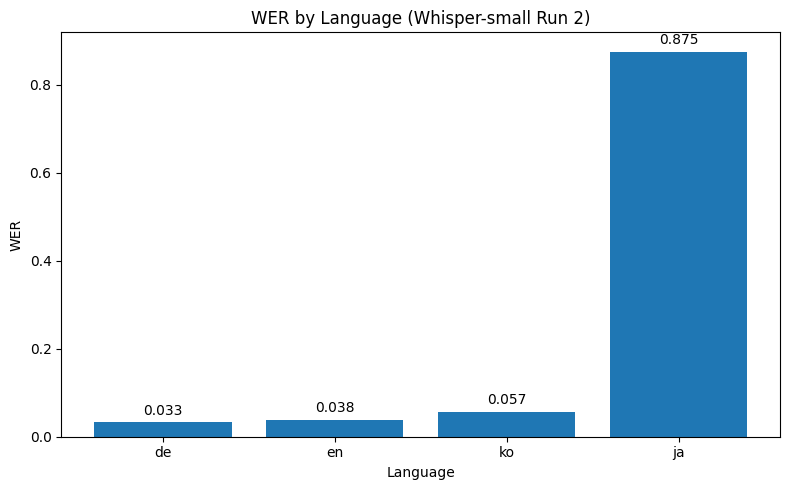

In [12]:
import matplotlib.pyplot as plt
import numpy as np

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8, 5))
bars = plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-small Run 2)")
plt.xlabel("Language")
plt.ylabel("WER")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("wer_small_run2_sorted.png")
plt.show()

- KO WER : 0.1191 -> 0.0572
- DE WER : 0.3411 -> 0.0326
- EN WER : 0.1973 -> 0.0385
- JA WER : 0.6700 -> 0.8750

→ 한국어, 영어, 독일어는 WER이 감소했지만, 일본어는 증가함